In [47]:
# Import de Bibliotecas
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from detecta import detect_peaks

In [2]:
# NB Configuration

%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')
plt.style.use(r'../../src/visualization/my_style.mplstyle')

In [3]:
path = r'../../data/raw/caso_full.csv.gz'
df = pd.read_csv(path)

In [4]:
df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [16]:
date_type_category = ['city', 'city_ibge_code', 'place_type','state']
df[date_type_category] = df[date_type_category].astype('category')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['last_available_date'] = pd.to_datetime(df['last_available_date'], format='%Y-%m-%d')
df = df.sort_values(by='date', ascending=True)


In [29]:
df_sp = df.query('state == "SP" and city == "São Paulo"')
df_am = df.query('state == "SP" and city == "Americana"')

In [19]:
df_sp.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1966493,São Paulo,3550308.0,2020-02-25,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0
1966495,São Paulo,3550308.0,2020-02-26,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0
1966497,São Paulo,3550308.0,2020-02-27,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0
1966499,São Paulo,3550308.0,2020-02-28,202009,12325232.0,12252023.0,False,False,2,0.01623,2020-02-28,0.0,0,4,city,SP,1,0
1966501,São Paulo,3550308.0,2020-02-29,202009,12325232.0,12252023.0,False,False,2,0.01623,2020-02-29,0.0,0,5,city,SP,0,0


[]

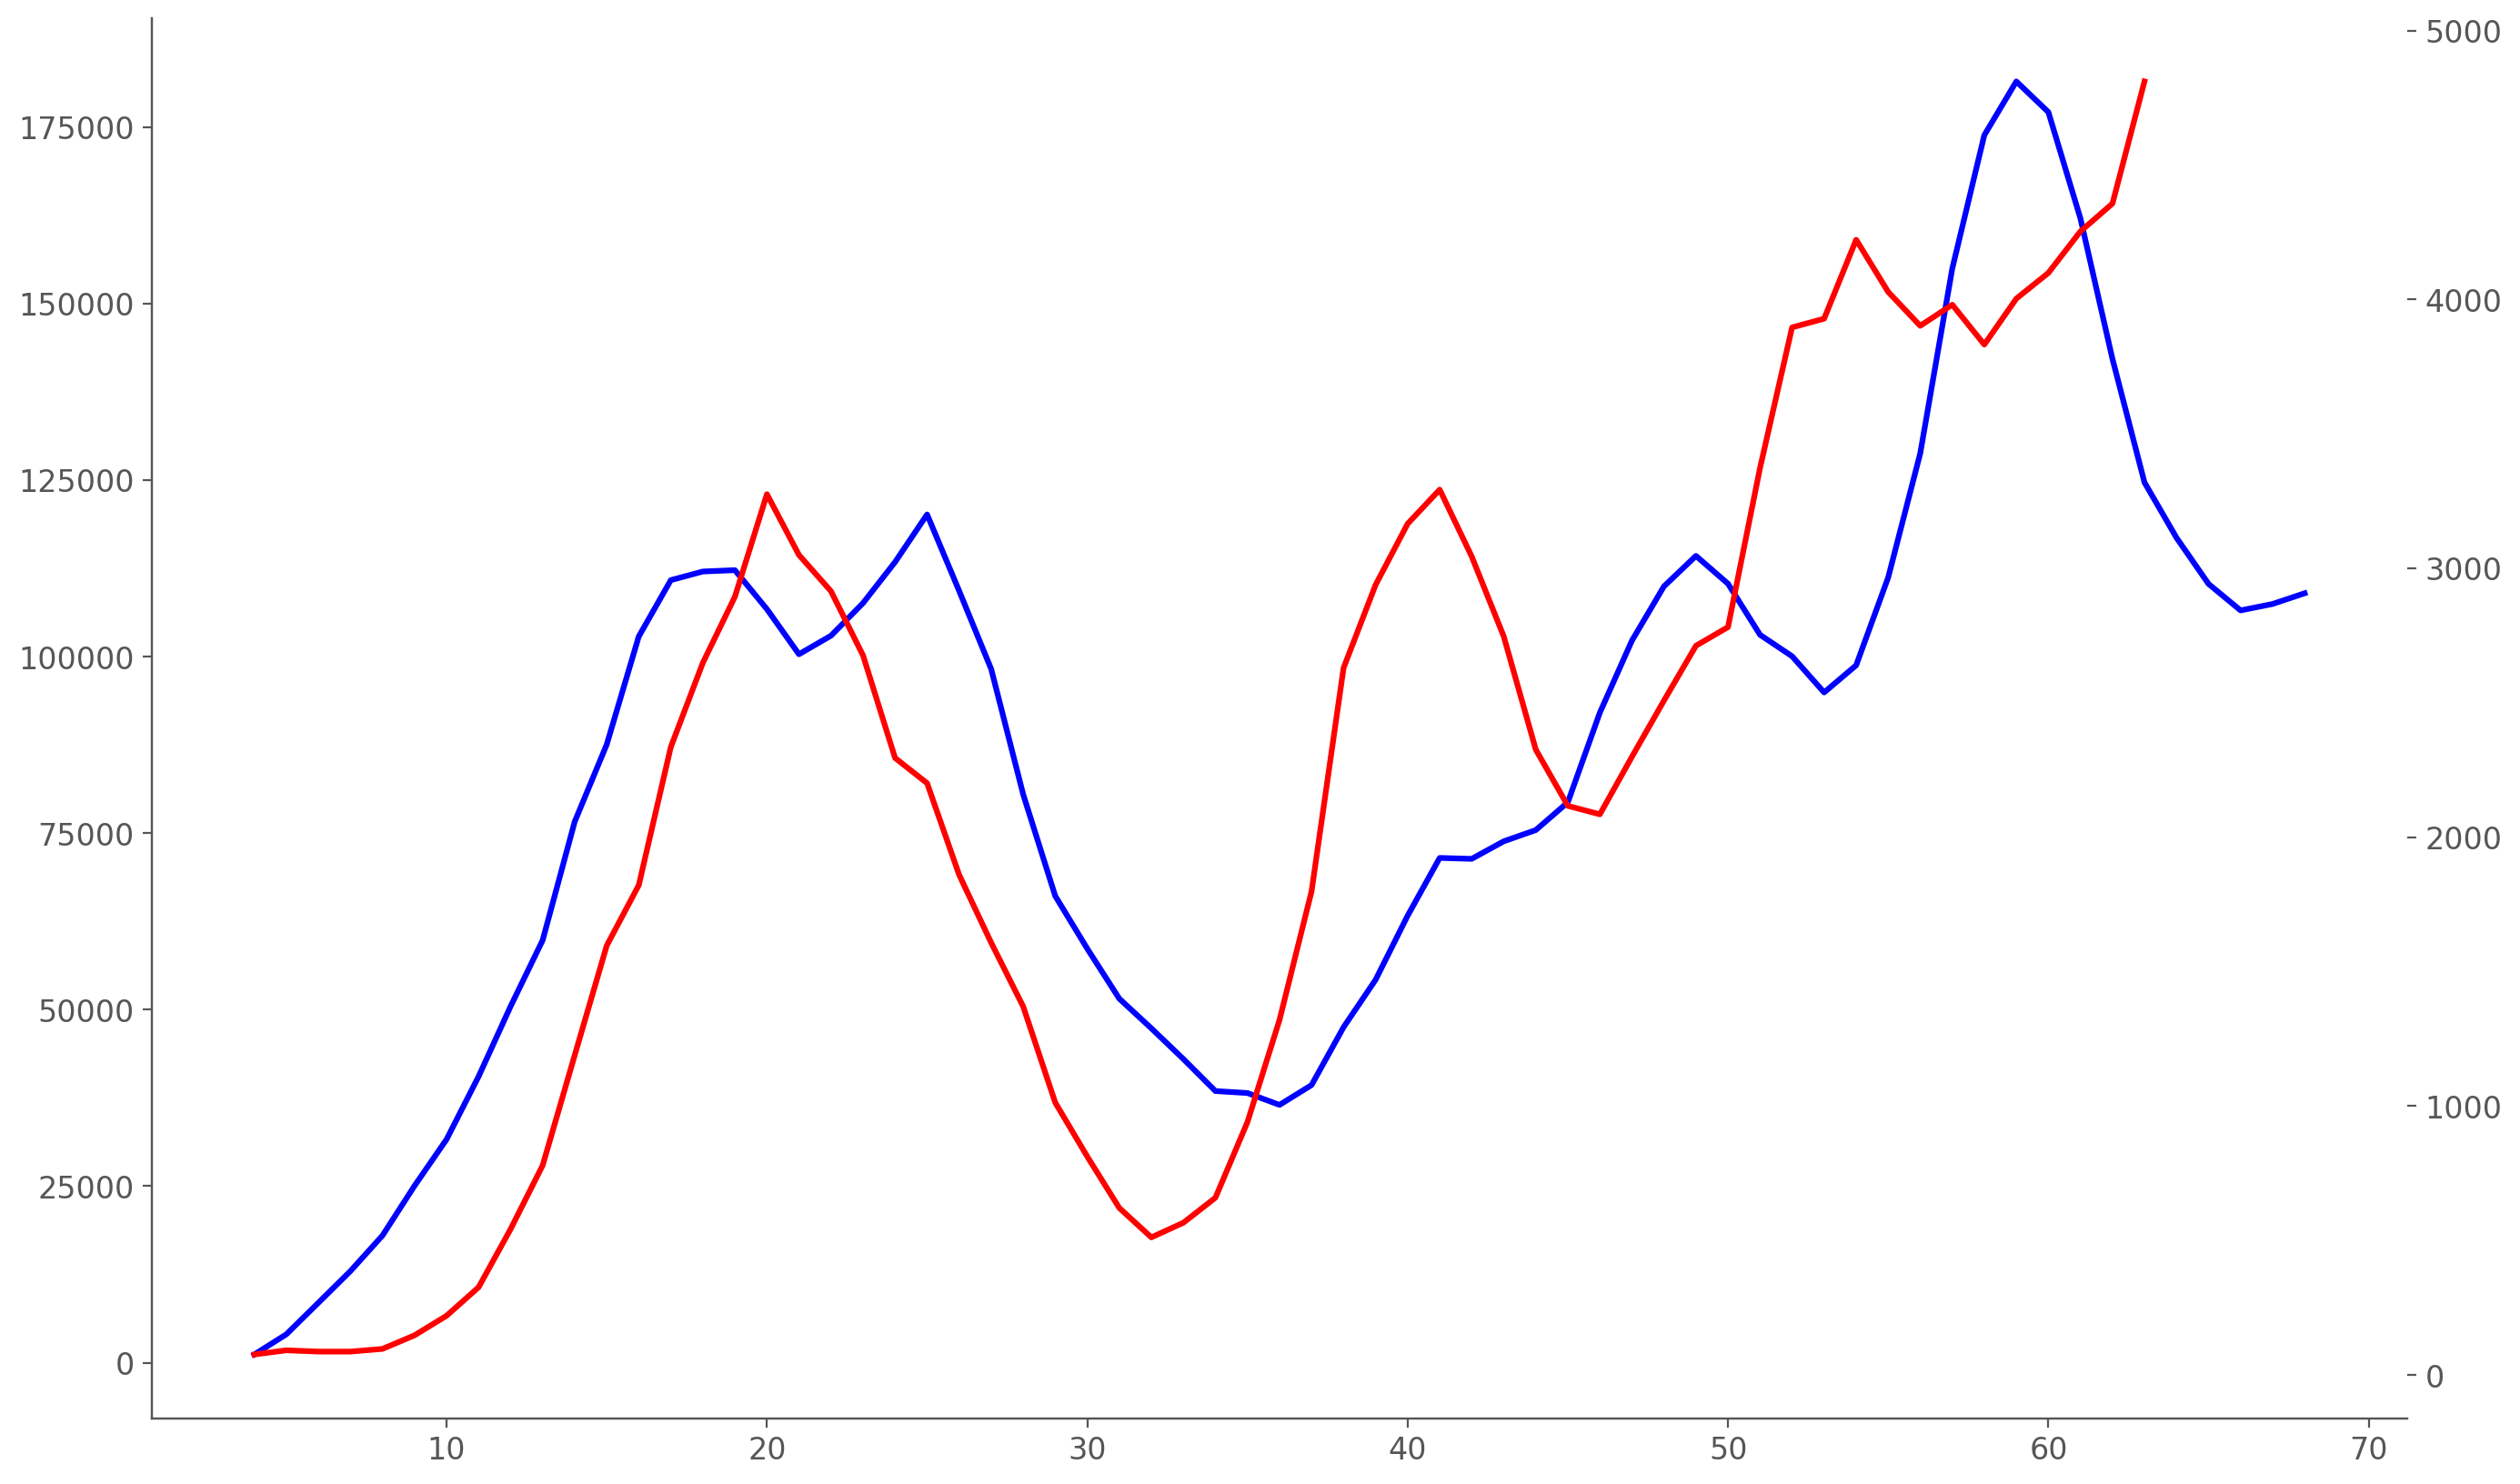

In [68]:
ax1 = df_sp.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1].diff().rolling(4).mean().plot(color='blue')
ax2 = ax1.twinx()
ax2 = df_am.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1].diff().rolling(4).mean().plot(color='red')
plt.plot()

In [44]:
x = np.correlate(df_sp.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1],
                 df_am.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1], mode='full')
x = x[len(x)//2:]

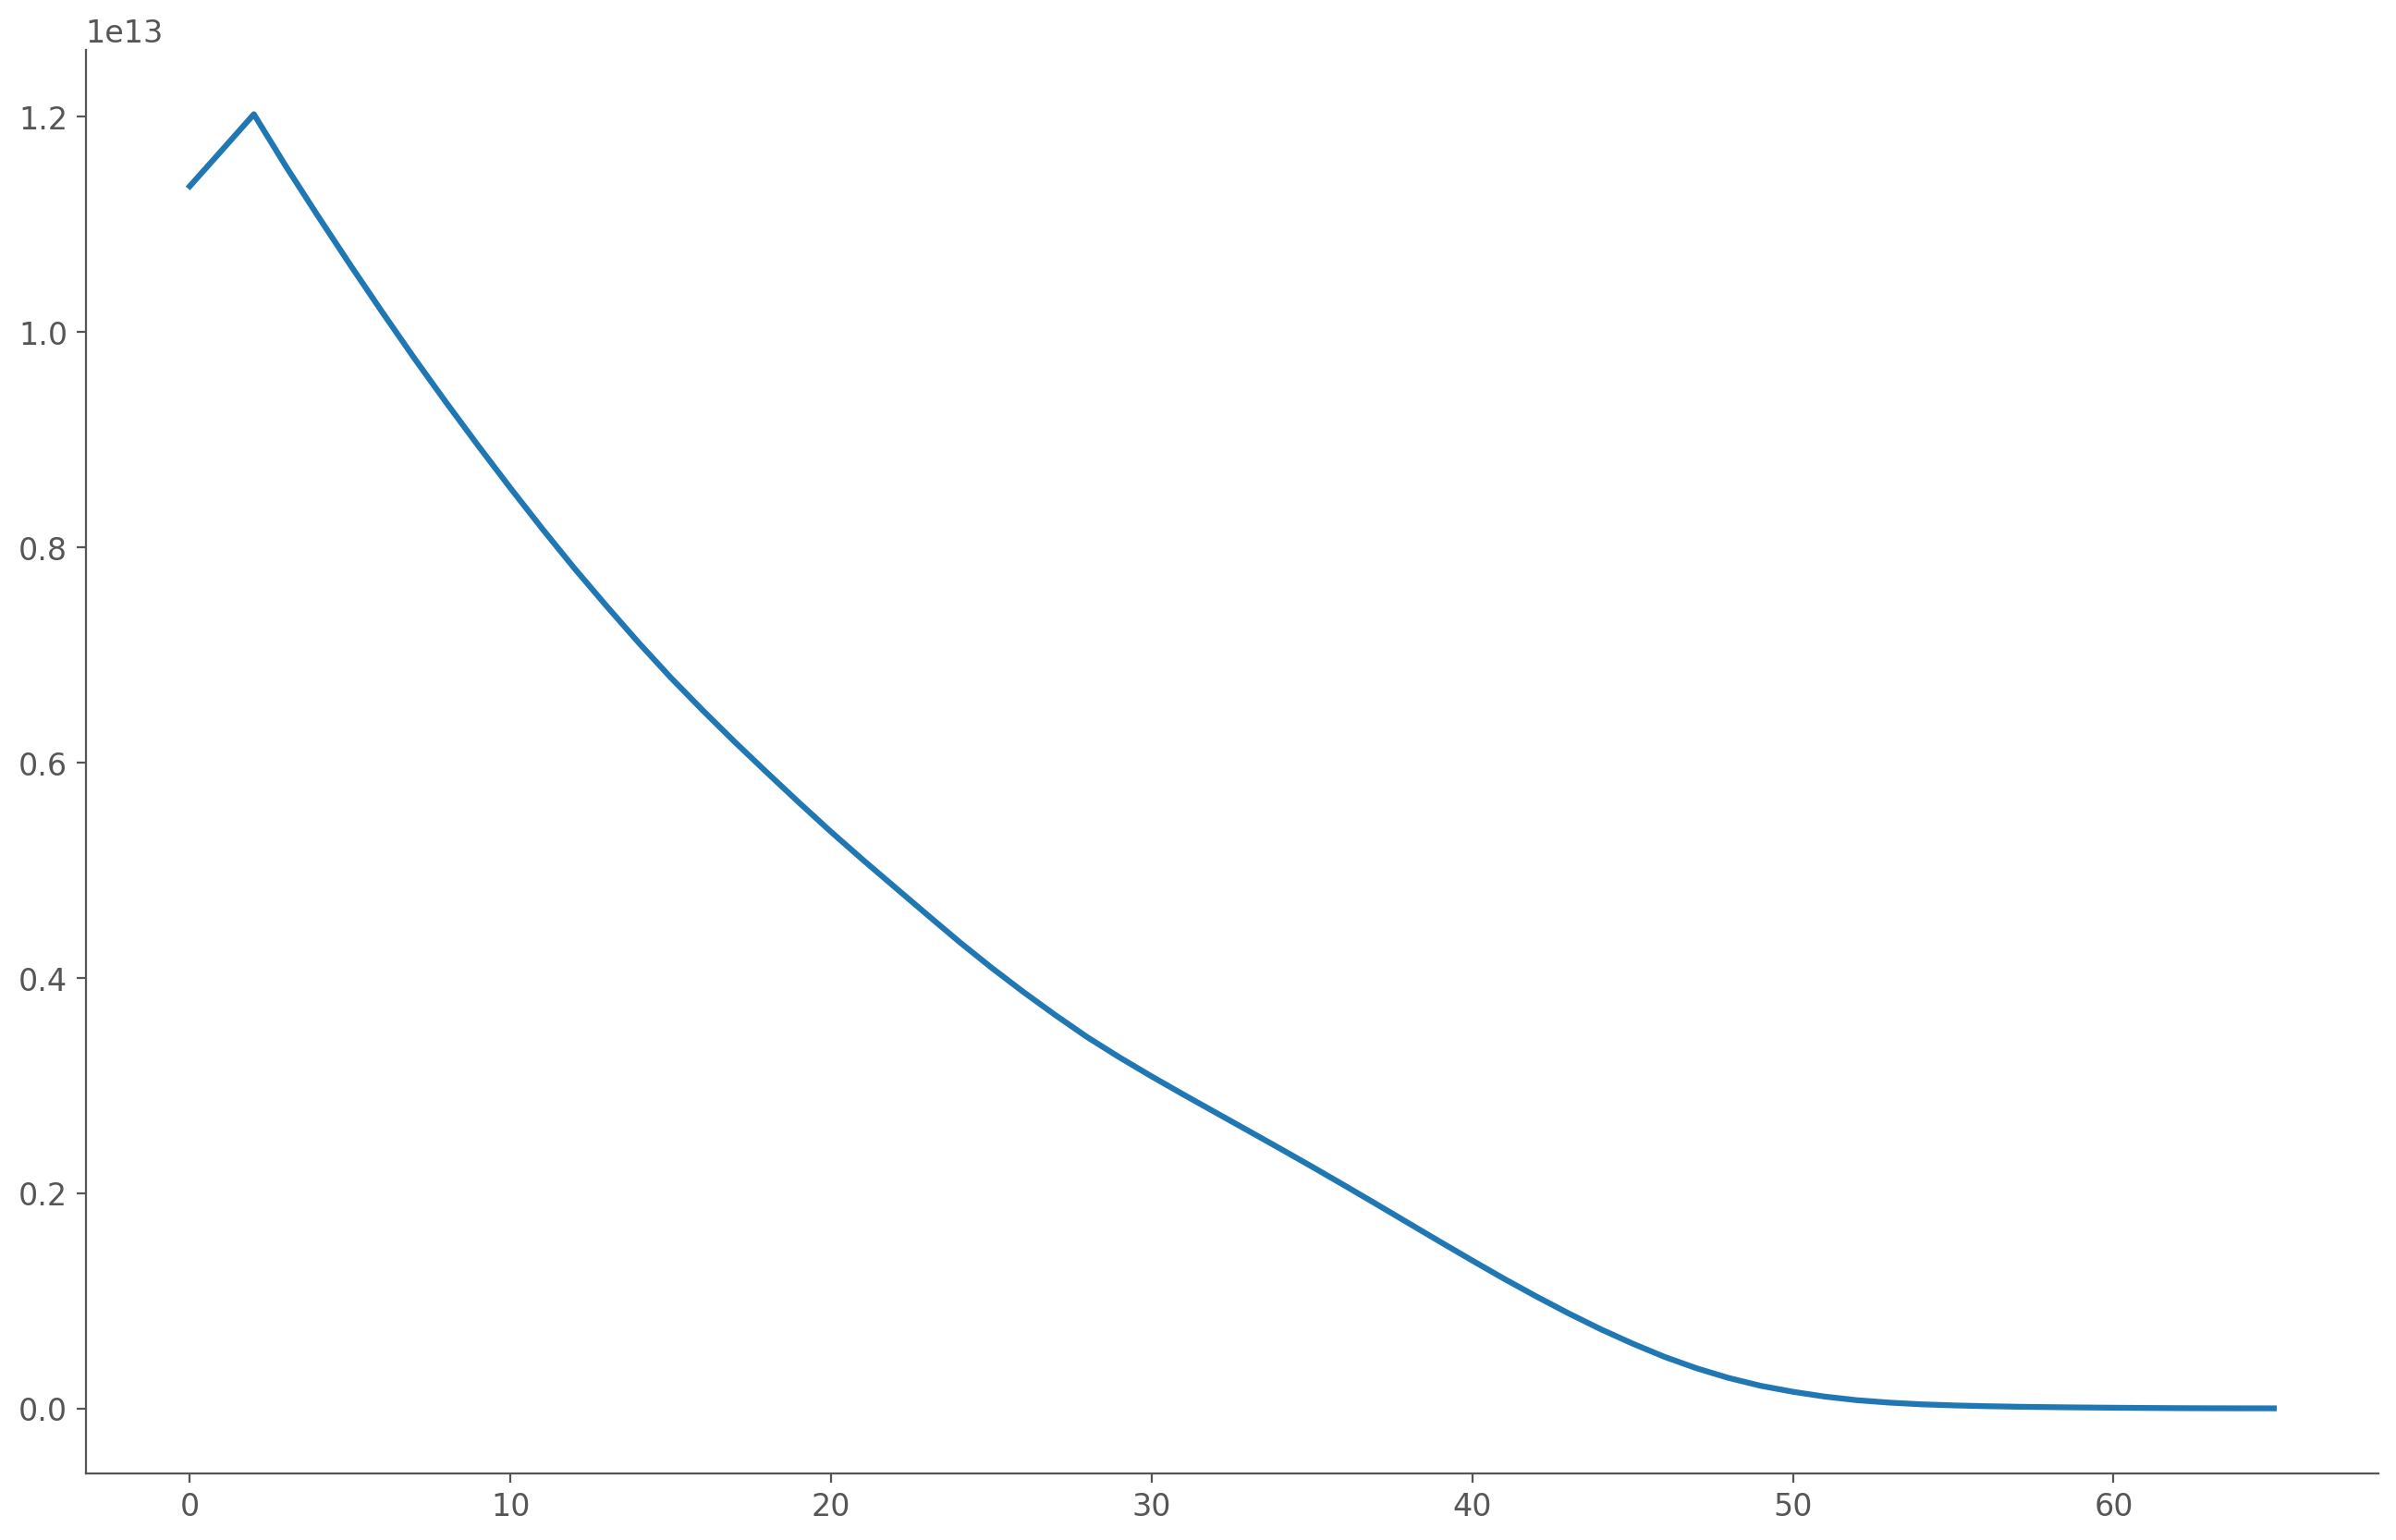

In [45]:
plt.plot(x)

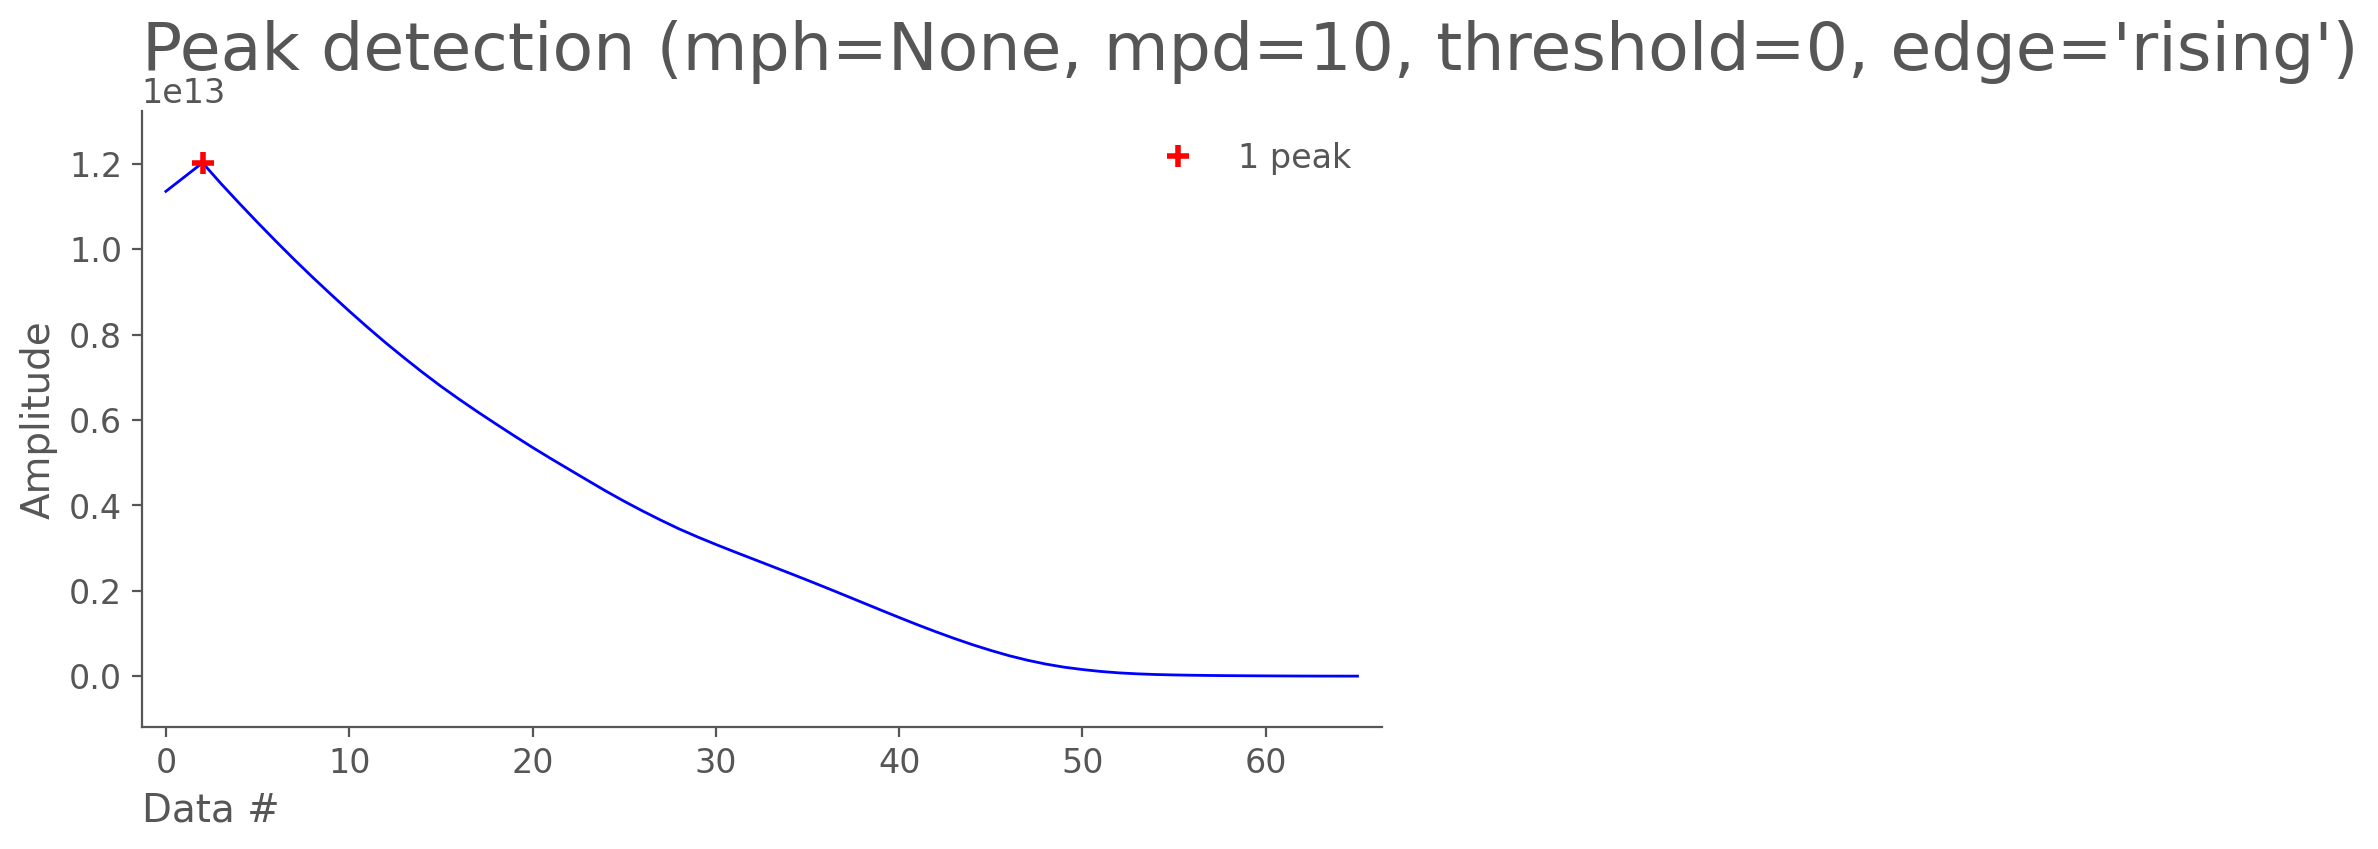

In [49]:
peak = detect_peaks(x, edge='rising', valley=False, mpd=10, show=True)

In [50]:
peak

array([2], dtype=int64)

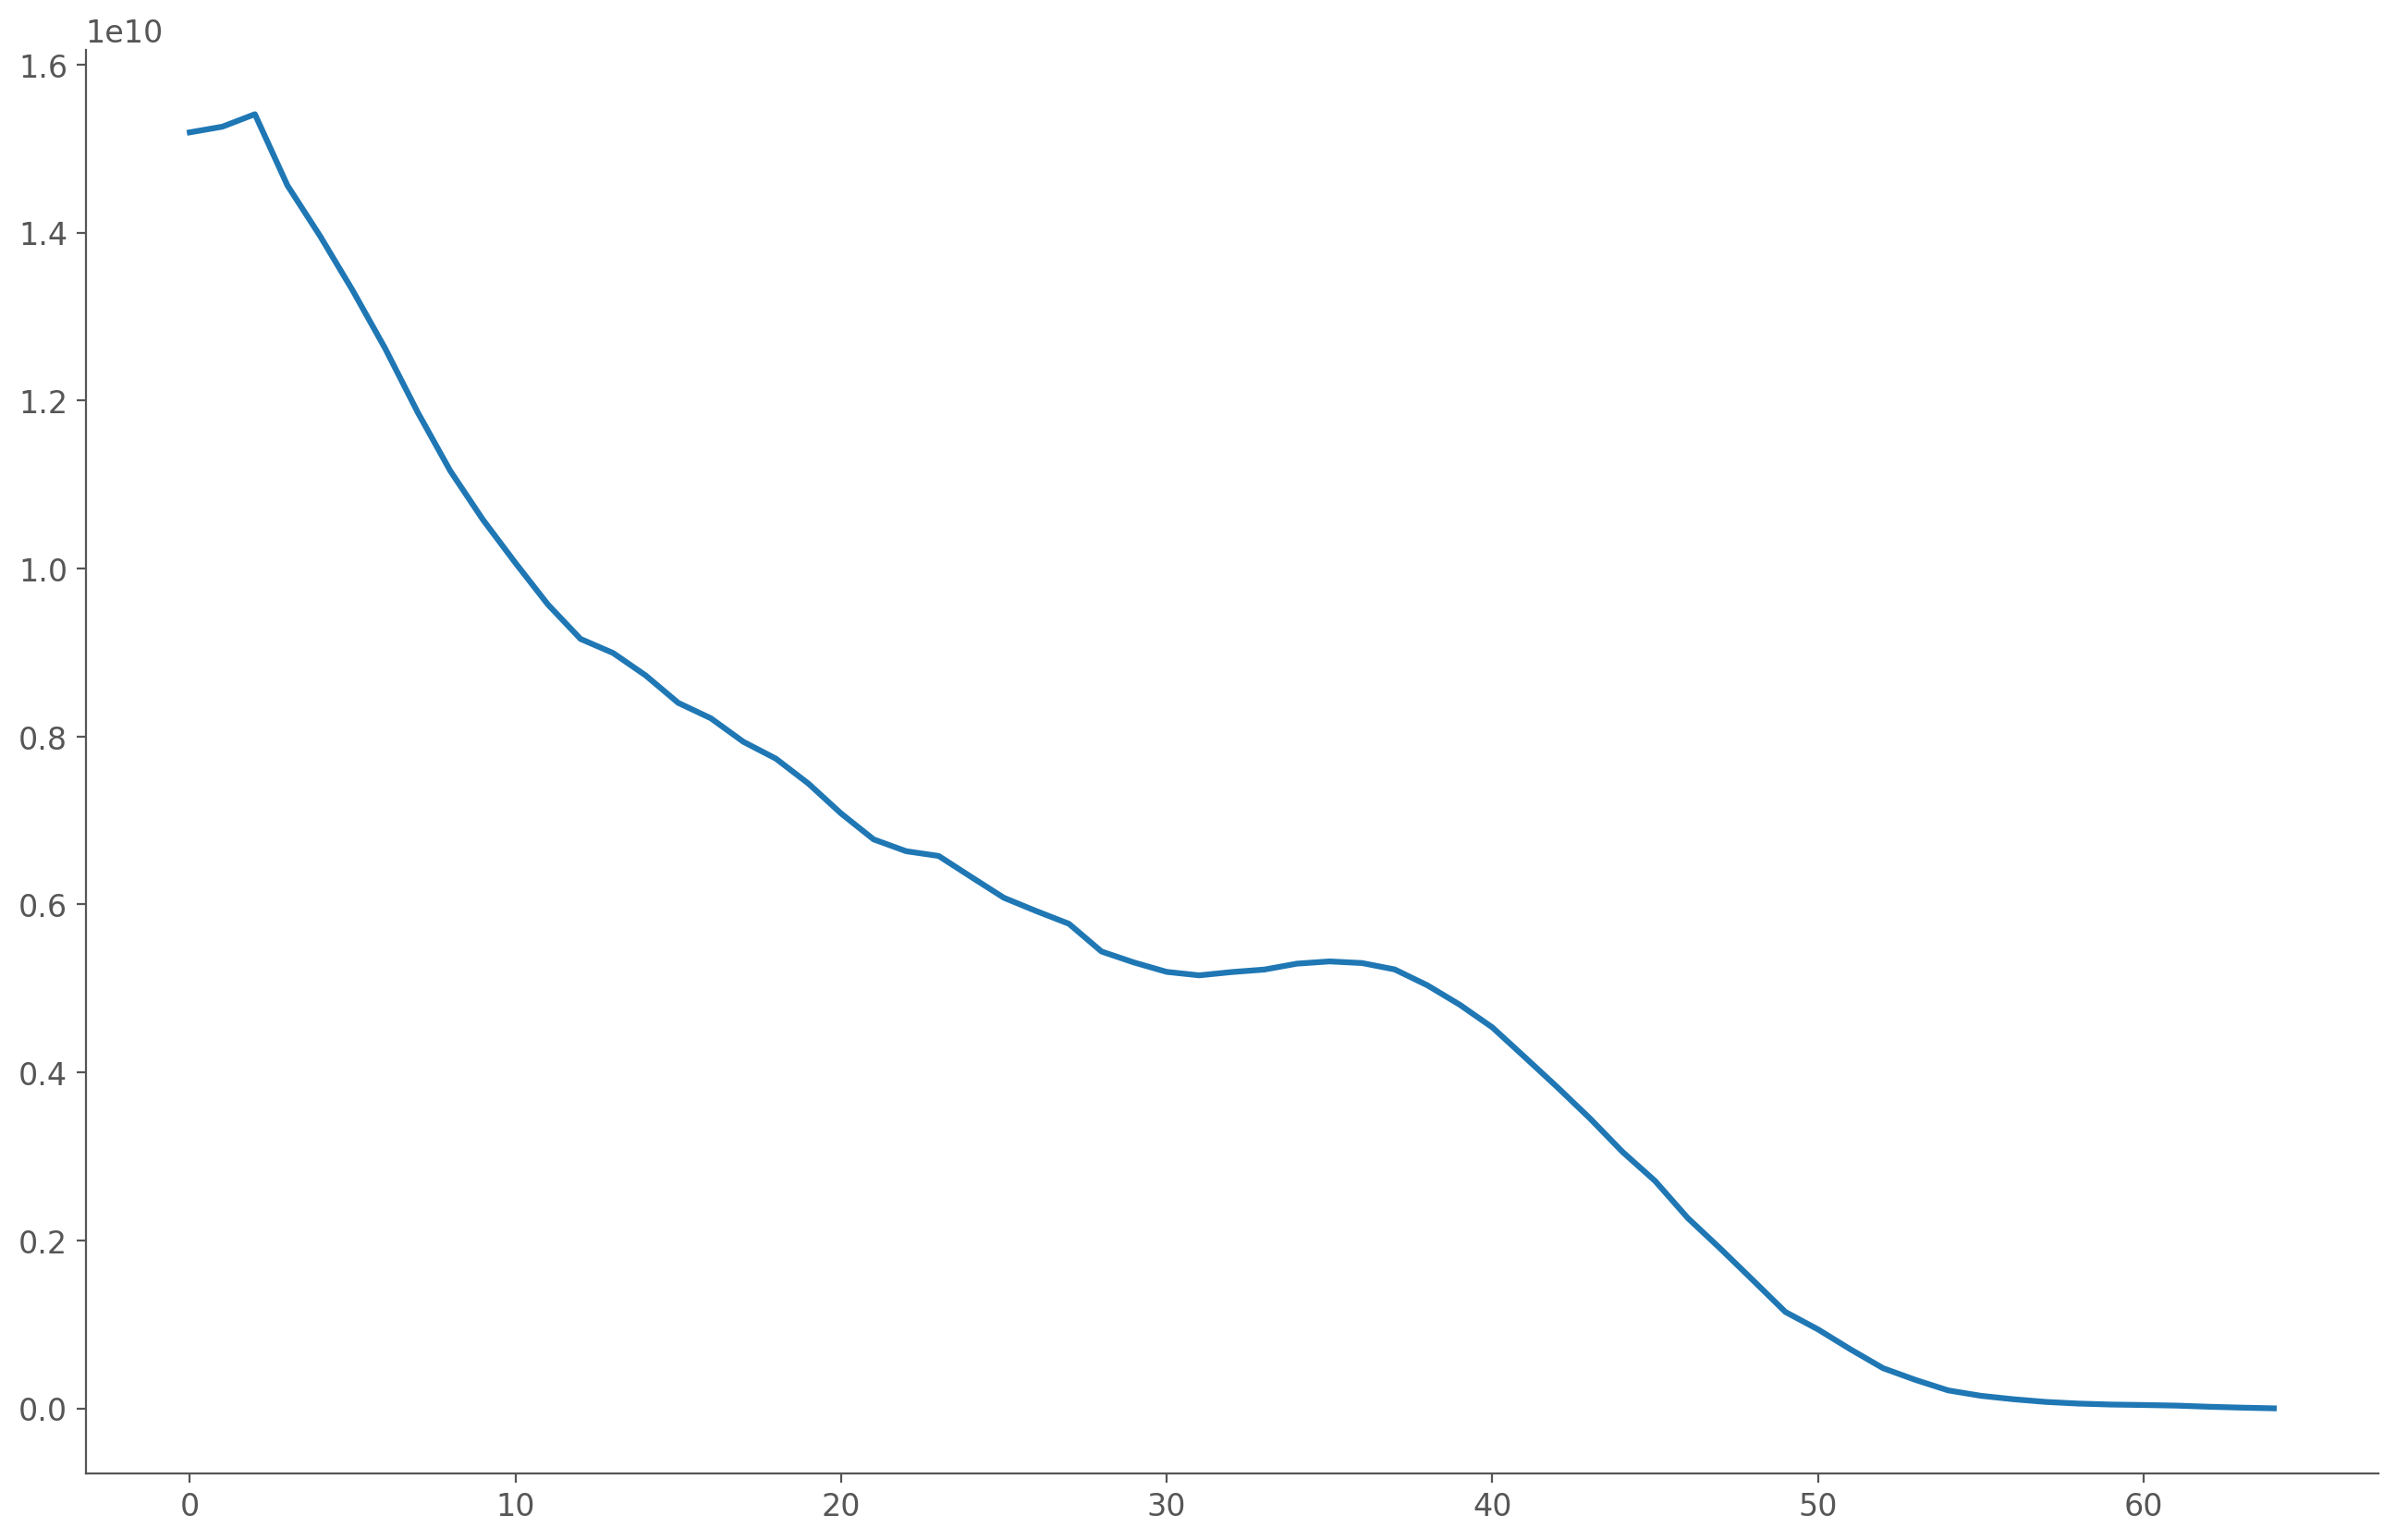

In [64]:
x1 = np.correlate(df_sp.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1].diff()[1:],
                 df_am.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1].diff()[1:], mode='full')
x1 = x1[len(x1)//2:]
plt.plot(x1)

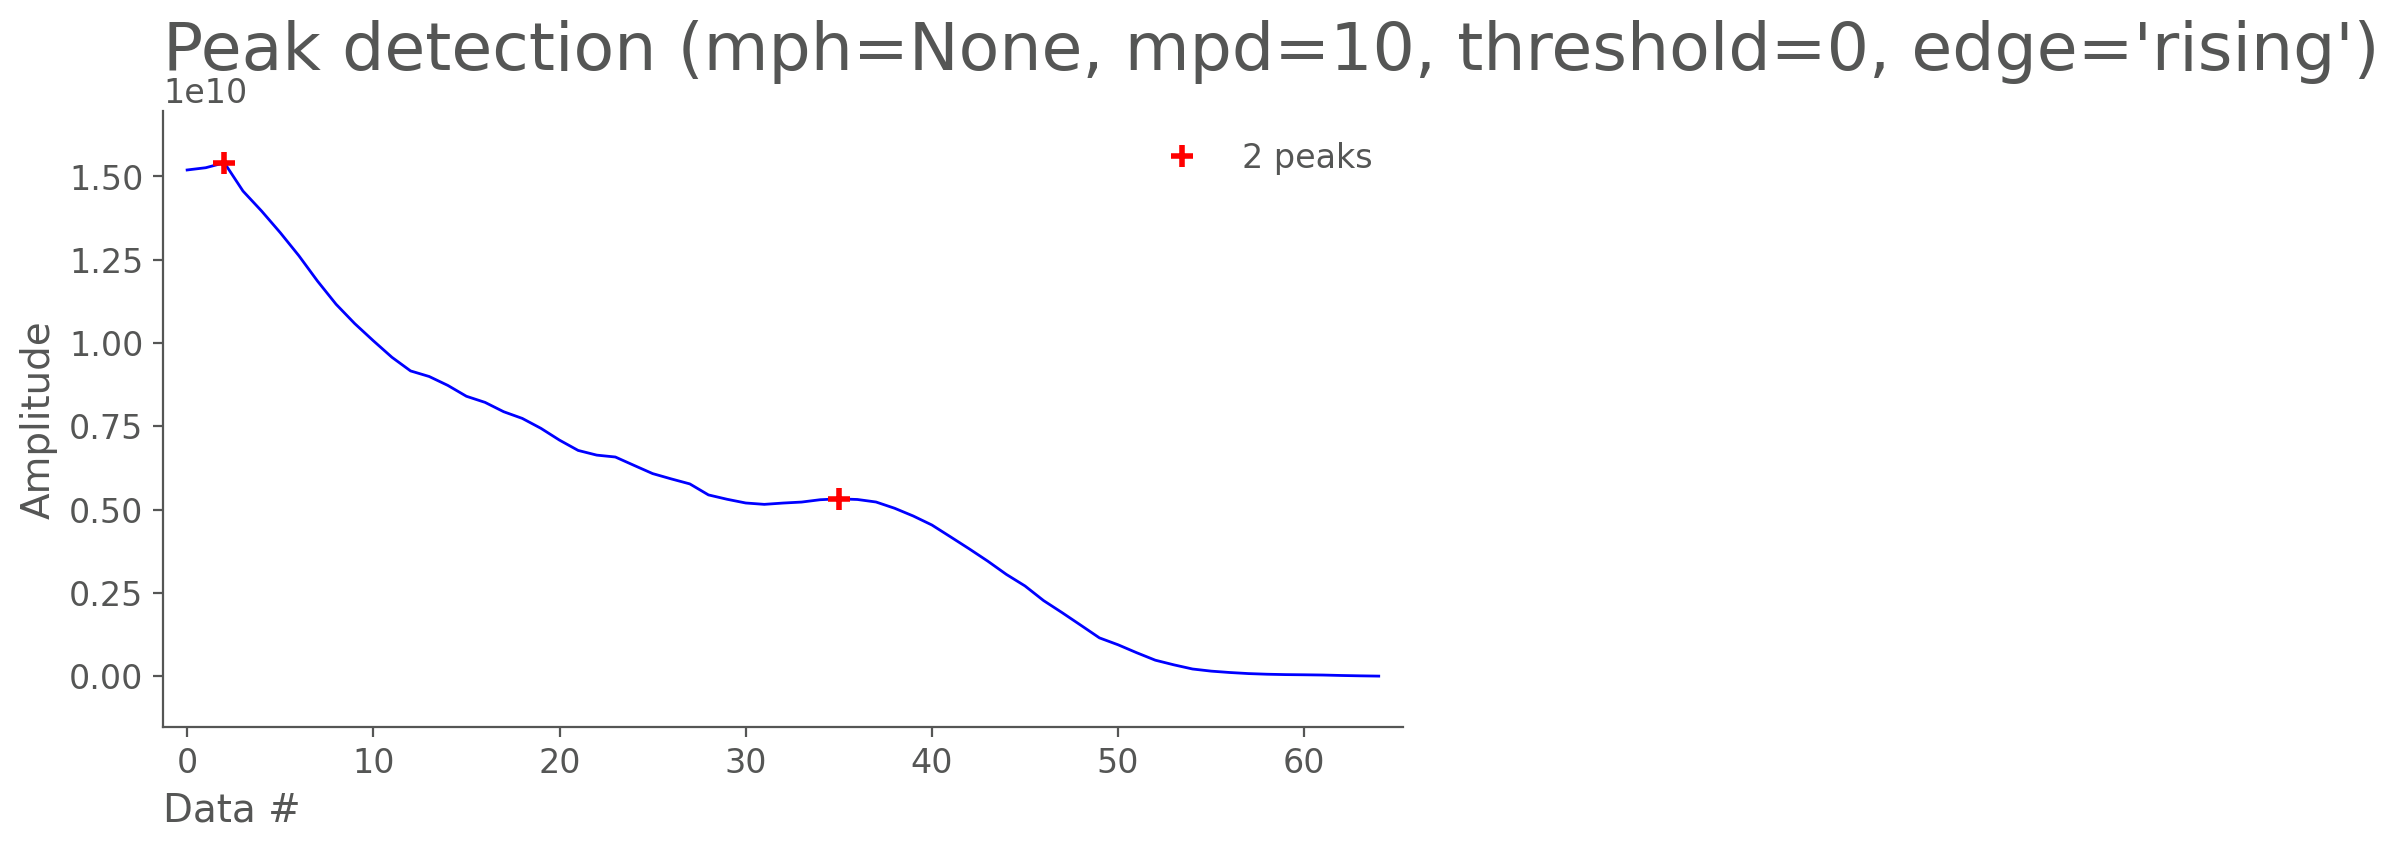

In [65]:
peak1 = detect_peaks(x1, edge='rising', valley=False, mpd=10, show=True)

In [66]:
peak1

array([ 2, 35], dtype=int64)

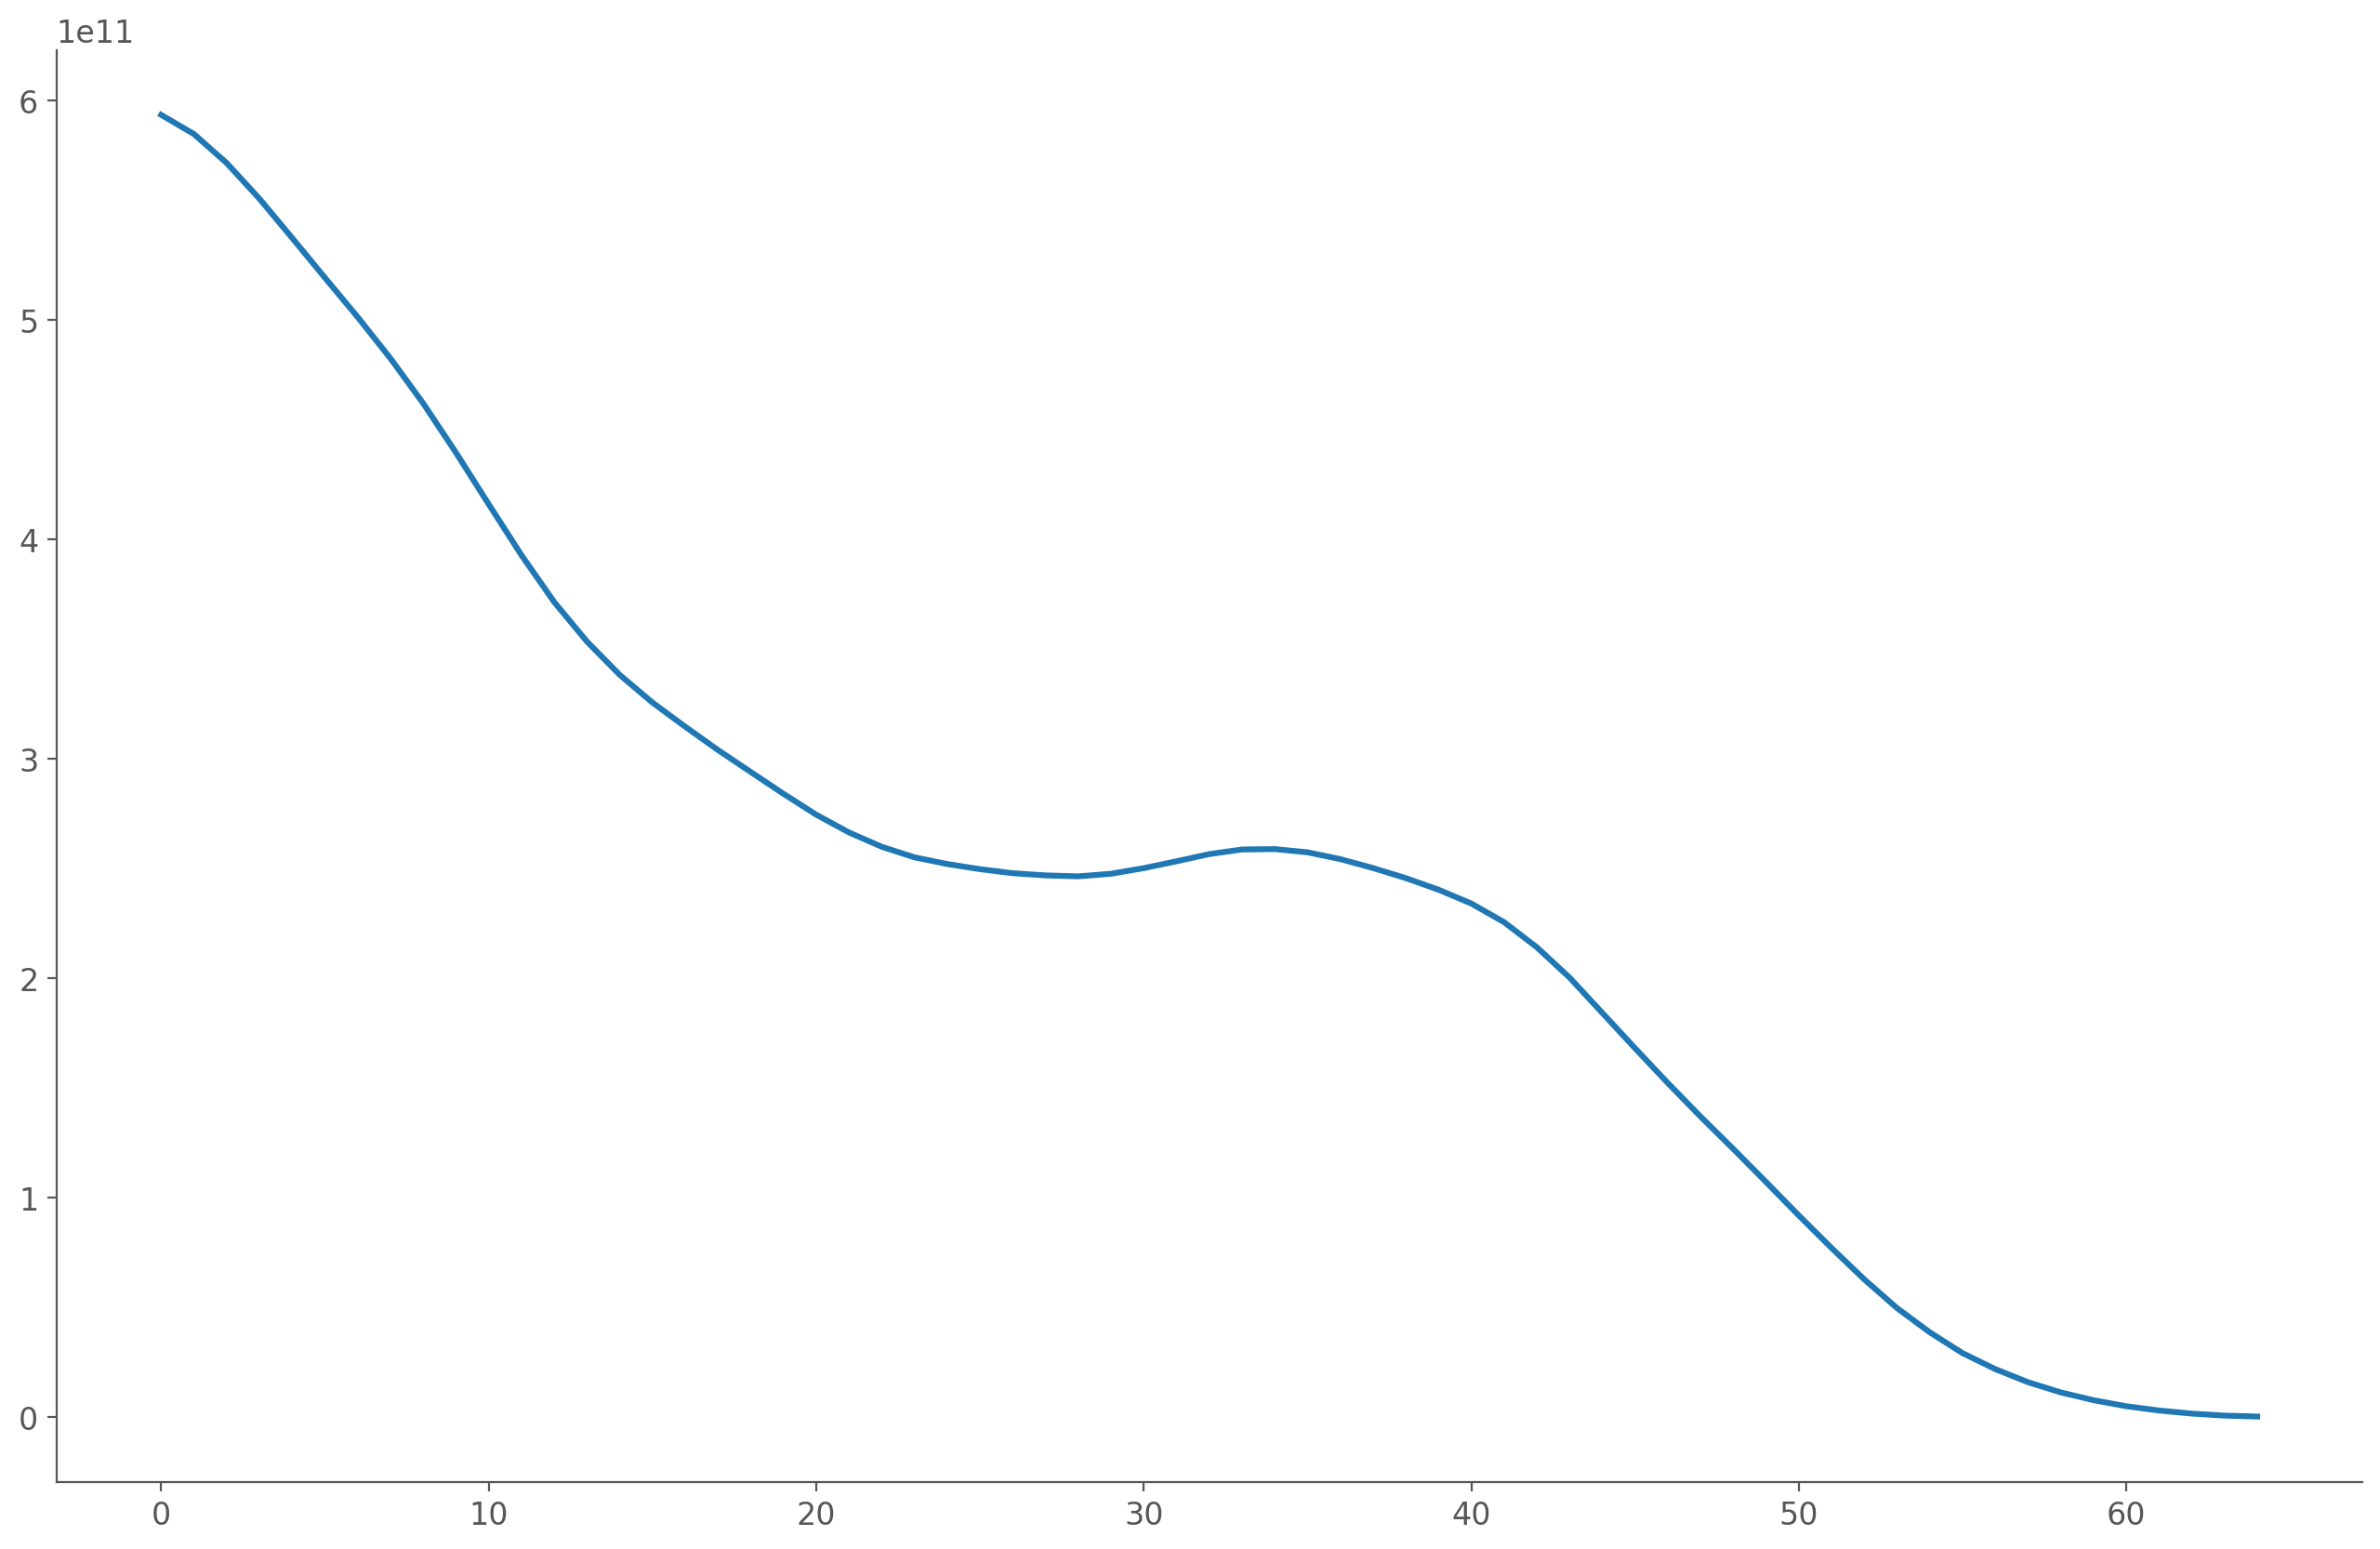

In [71]:
x2 = np.correlate(df_sp.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1].diff().rolling(4).mean()[4:],
                 df_sp.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1].diff().rolling(4).mean()[4:],  mode='full')
x2 = x2[len(x2)//2:]
plt.plot(x2)

In [70]:
df_sp.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1].diff().rolling(4).mean()

0           NaN
1           NaN
2           NaN
3           NaN
4       1155.00
        ...    
64    116840.25
65    110300.50
66    106550.50
67    107463.75
68    108980.25
Name: last_available_confirmed, Length: 69, dtype: float64

[]

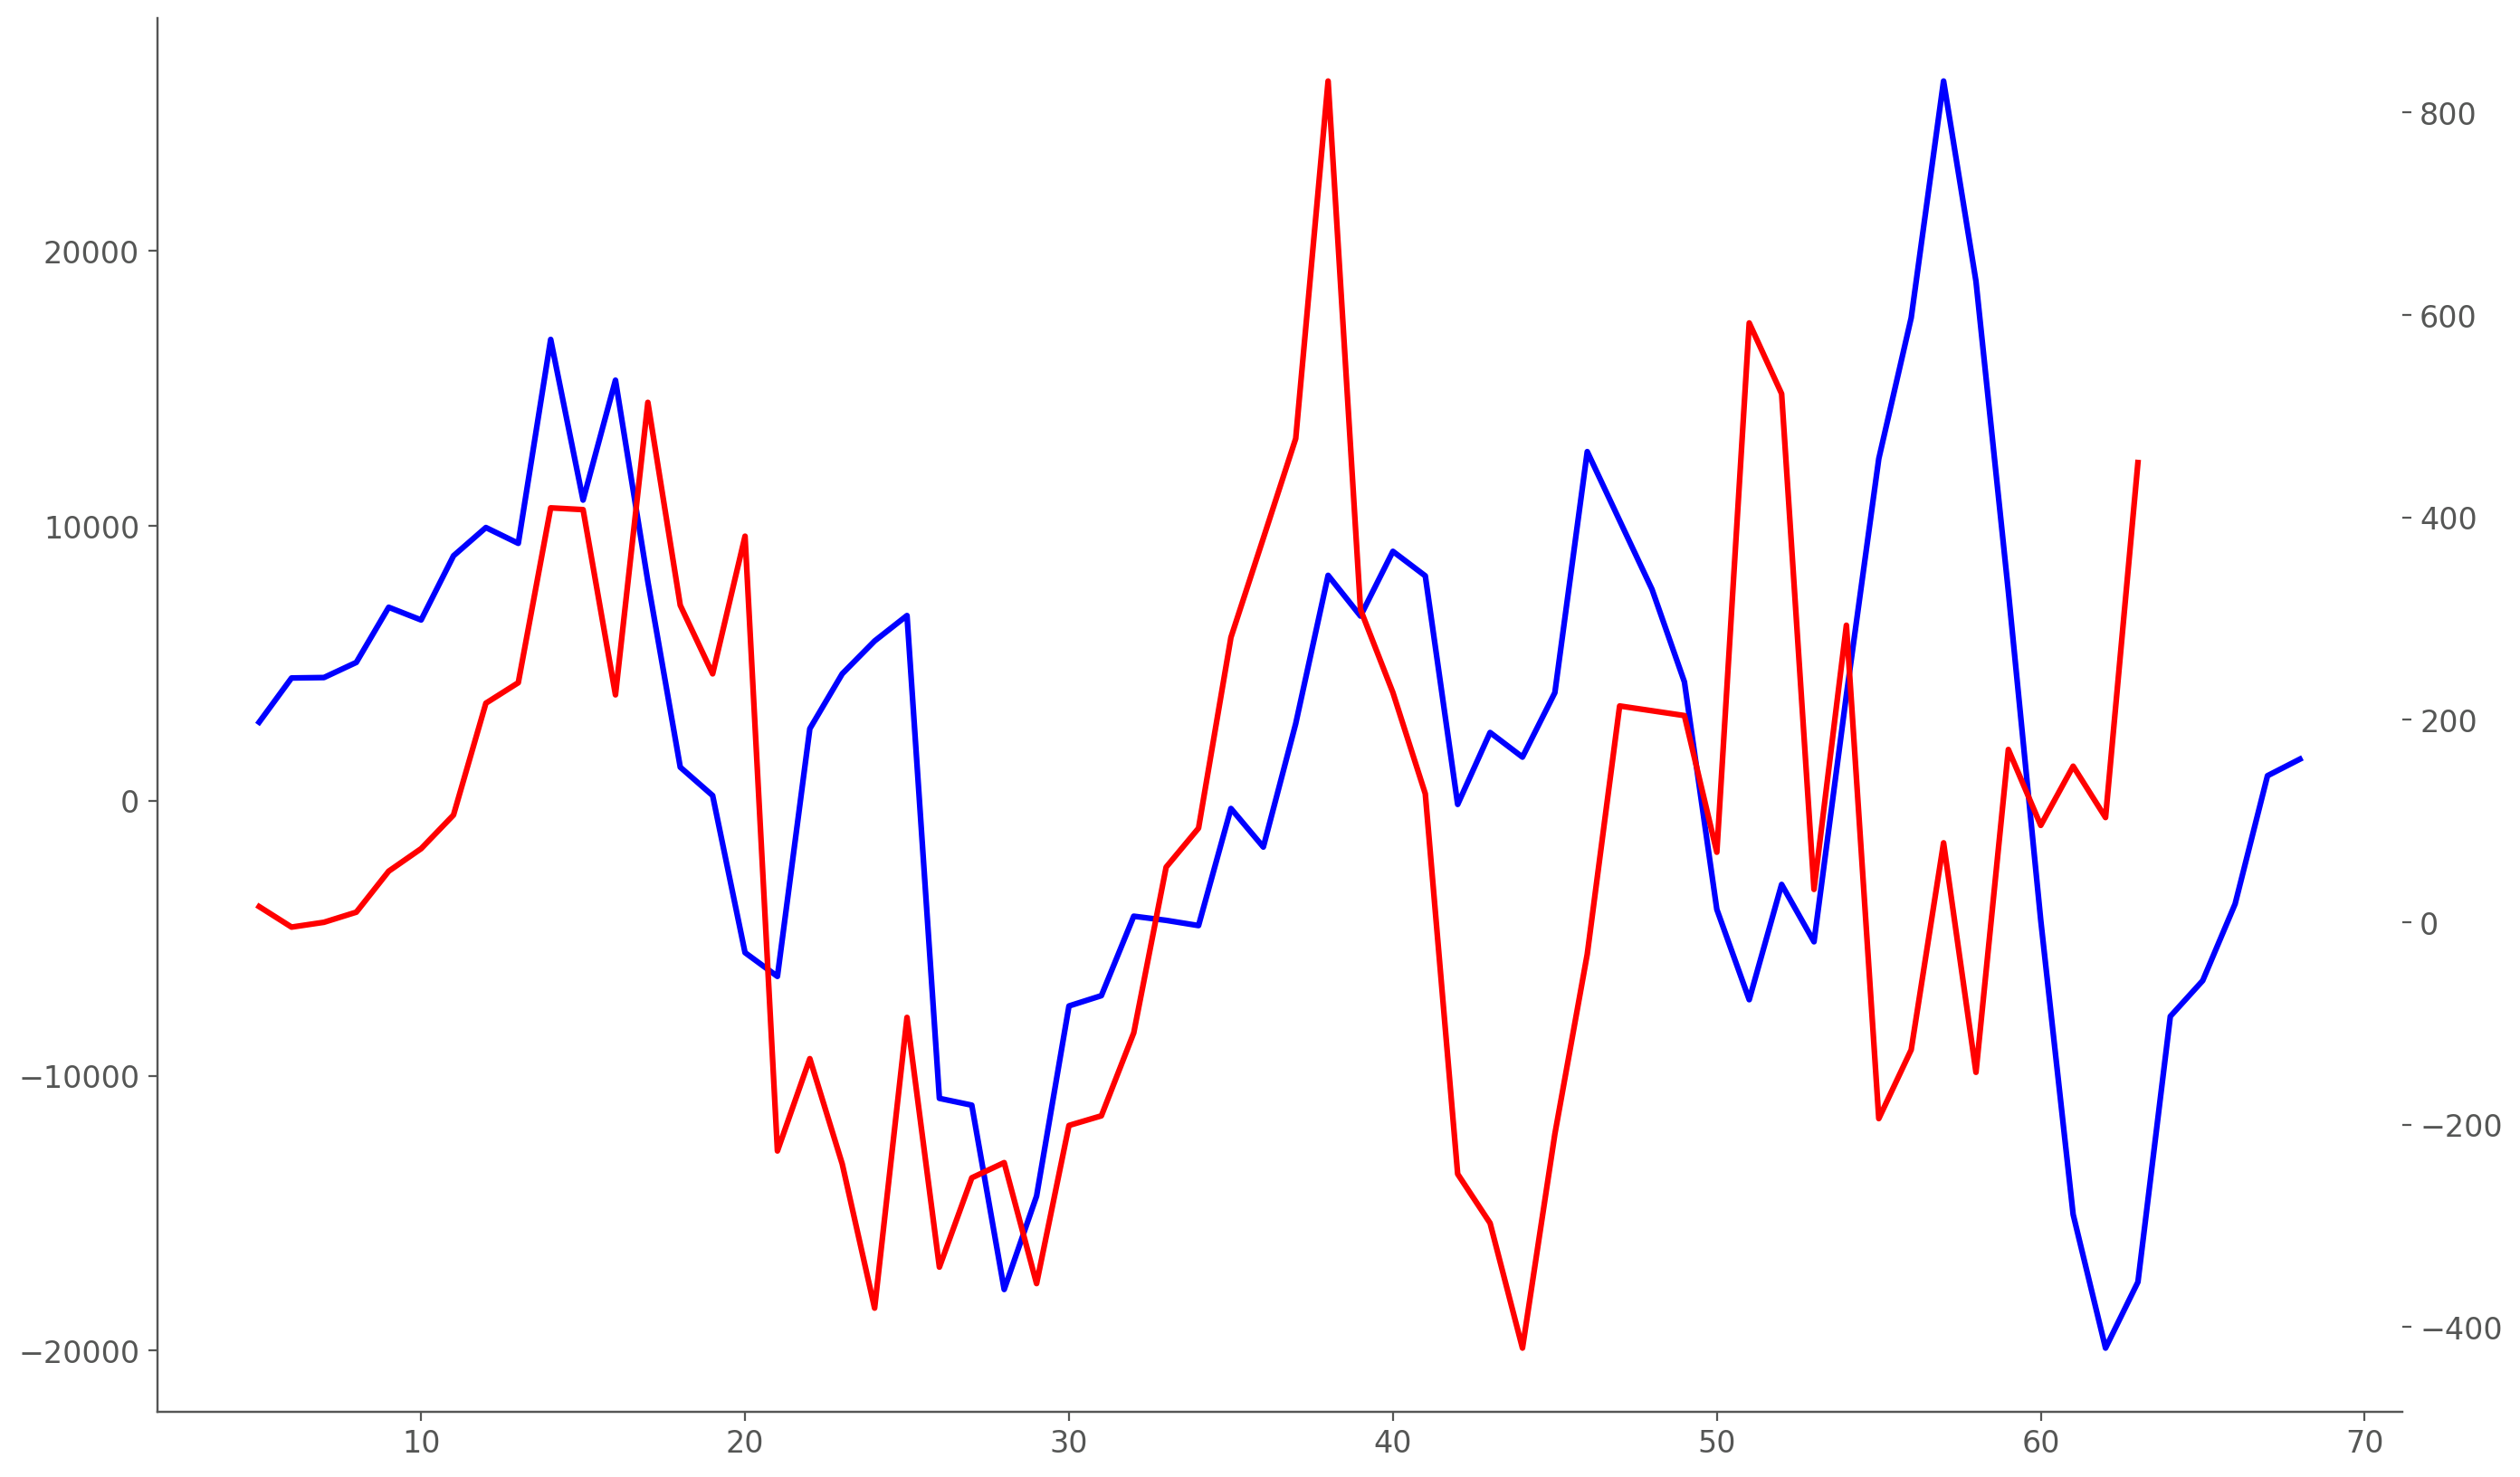

In [72]:
ax1 = df_sp.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1].diff().diff().rolling(4).mean().plot(color='blue')
ax2 = ax1.twinx()
ax2 = df_am.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1].diff().diff().rolling(4).mean().plot(color='red')
plt.plot()

[]

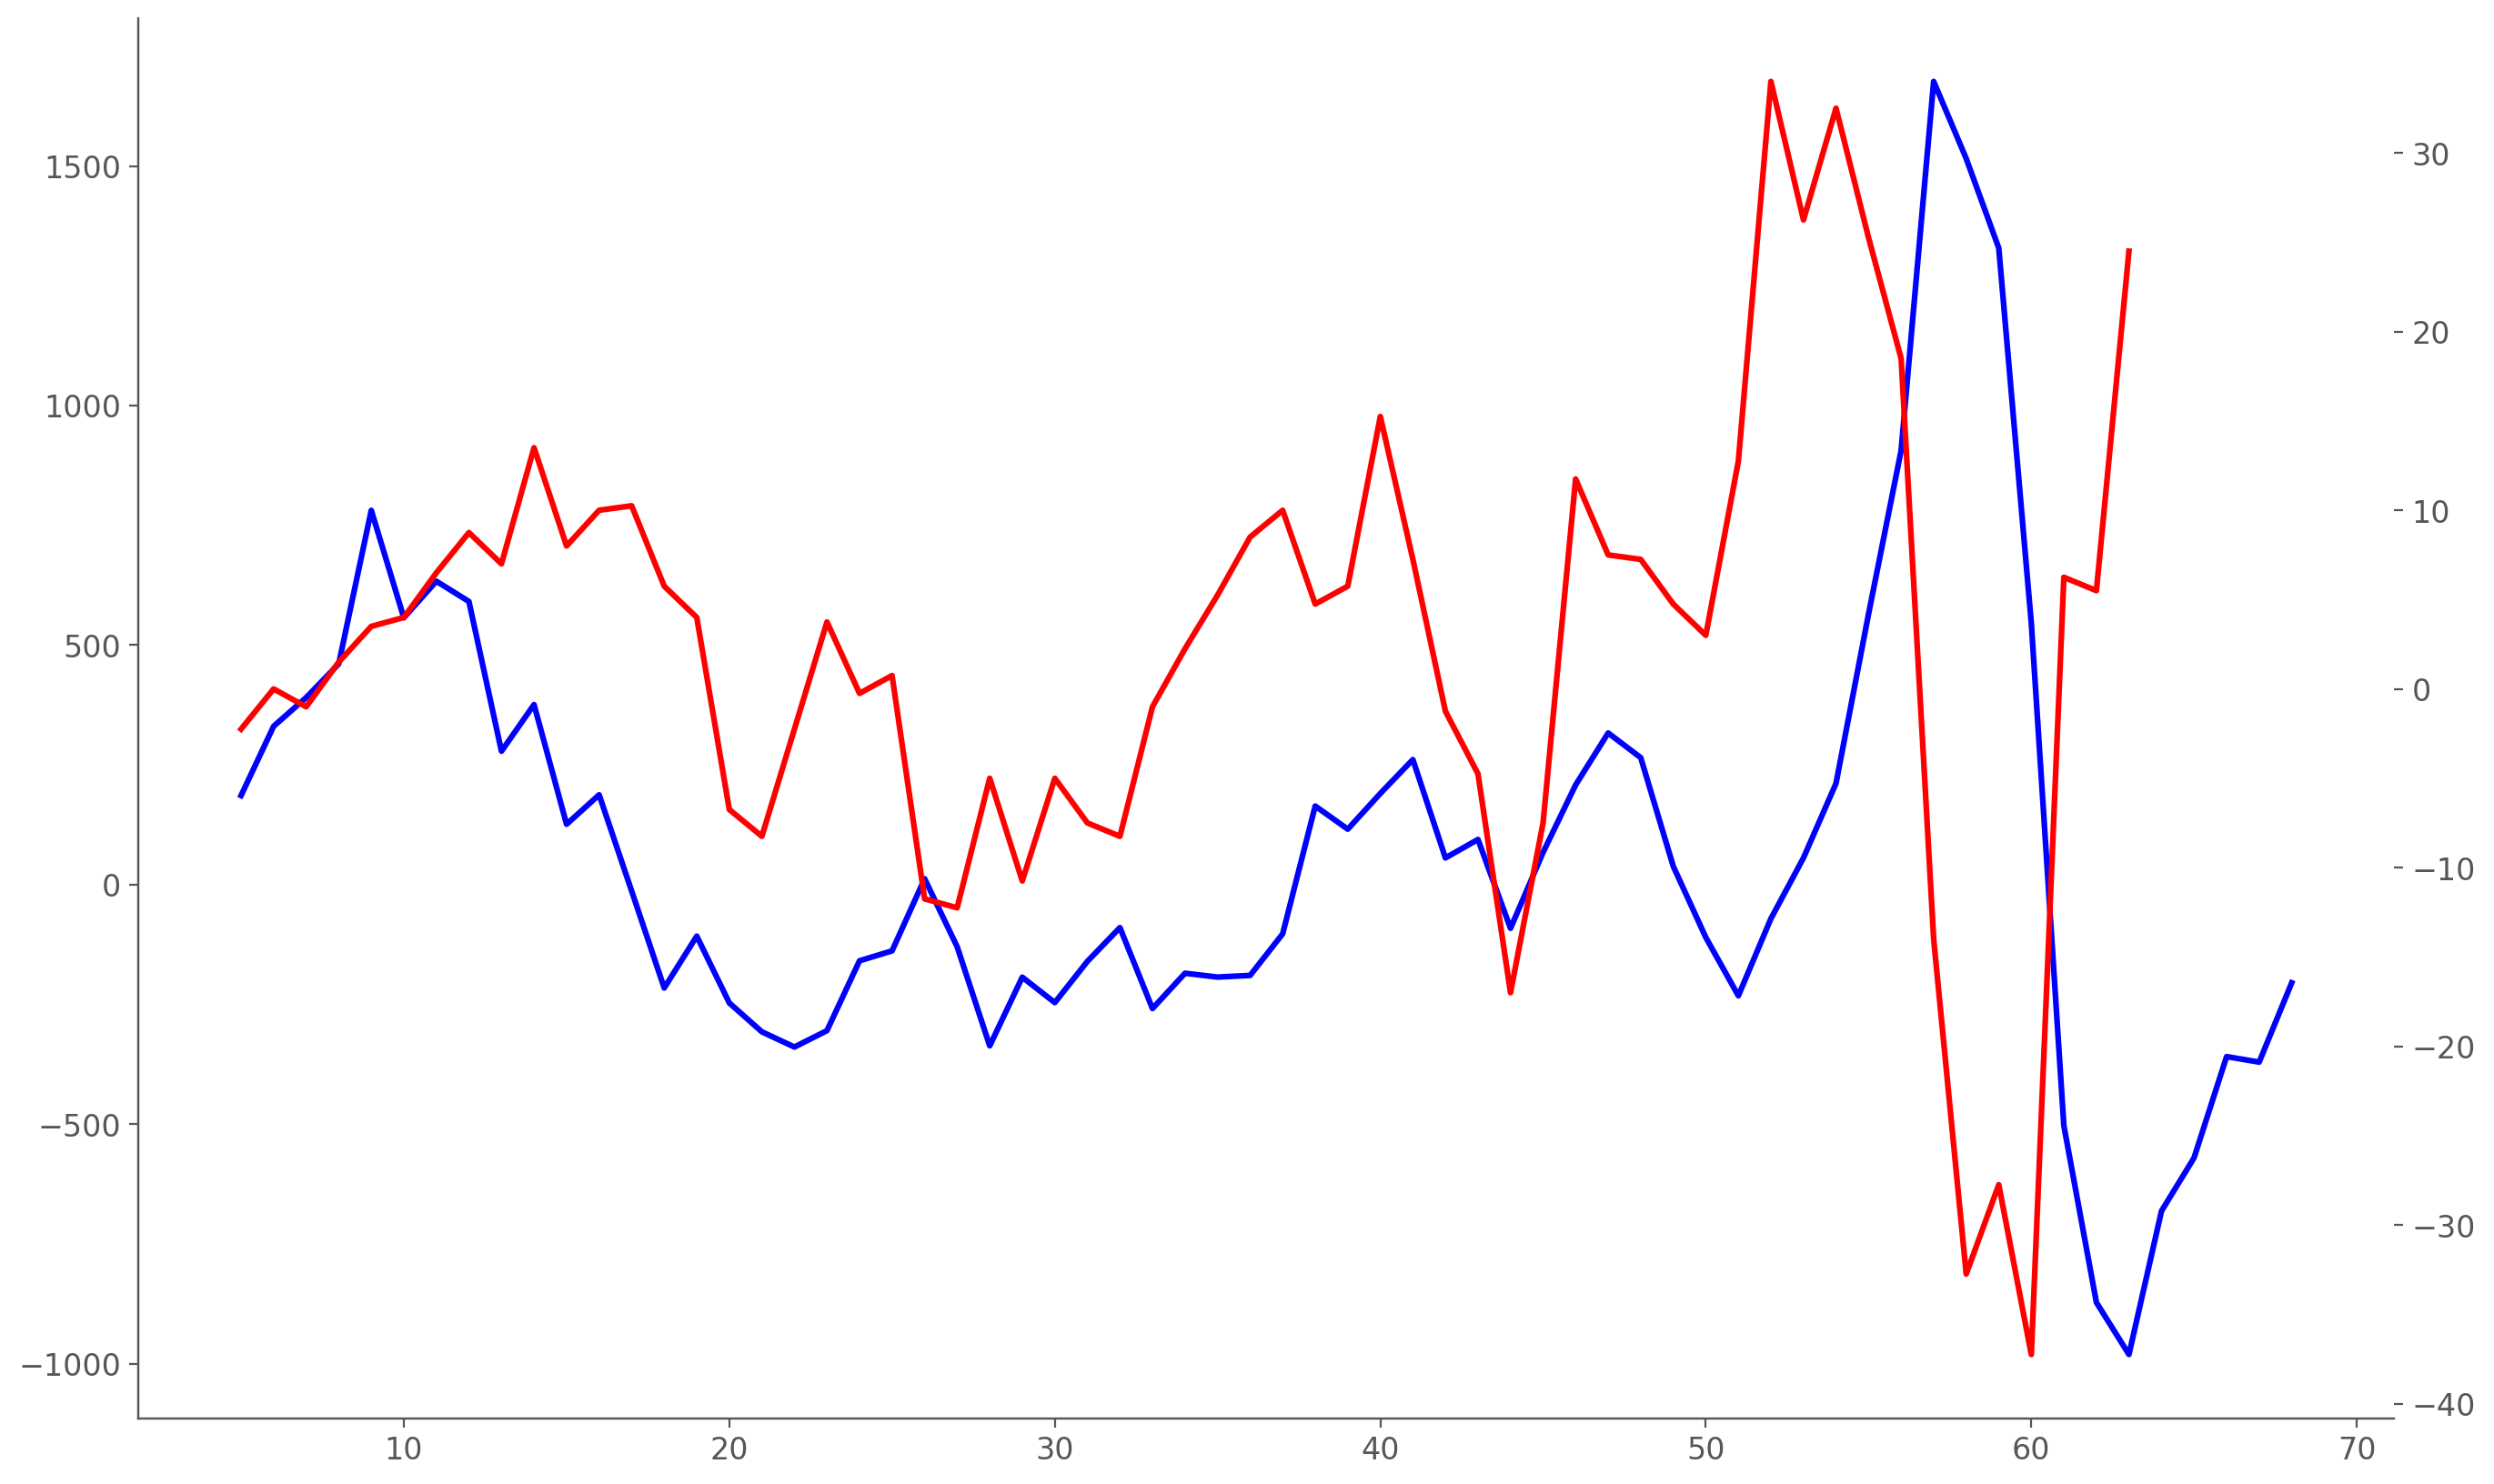

In [75]:
ax1 = df_sp.groupby('epidemiological_week').sum().reset_index()['last_available_deaths'][:-1].diff().diff().rolling(4).mean().plot(color='blue')
ax2 = ax1.twinx()
ax2 = df_am.groupby('epidemiological_week').sum().reset_index()['last_available_deaths'][:-1].diff().diff().rolling(4).mean().plot(color='red')
plt.plot()

[]

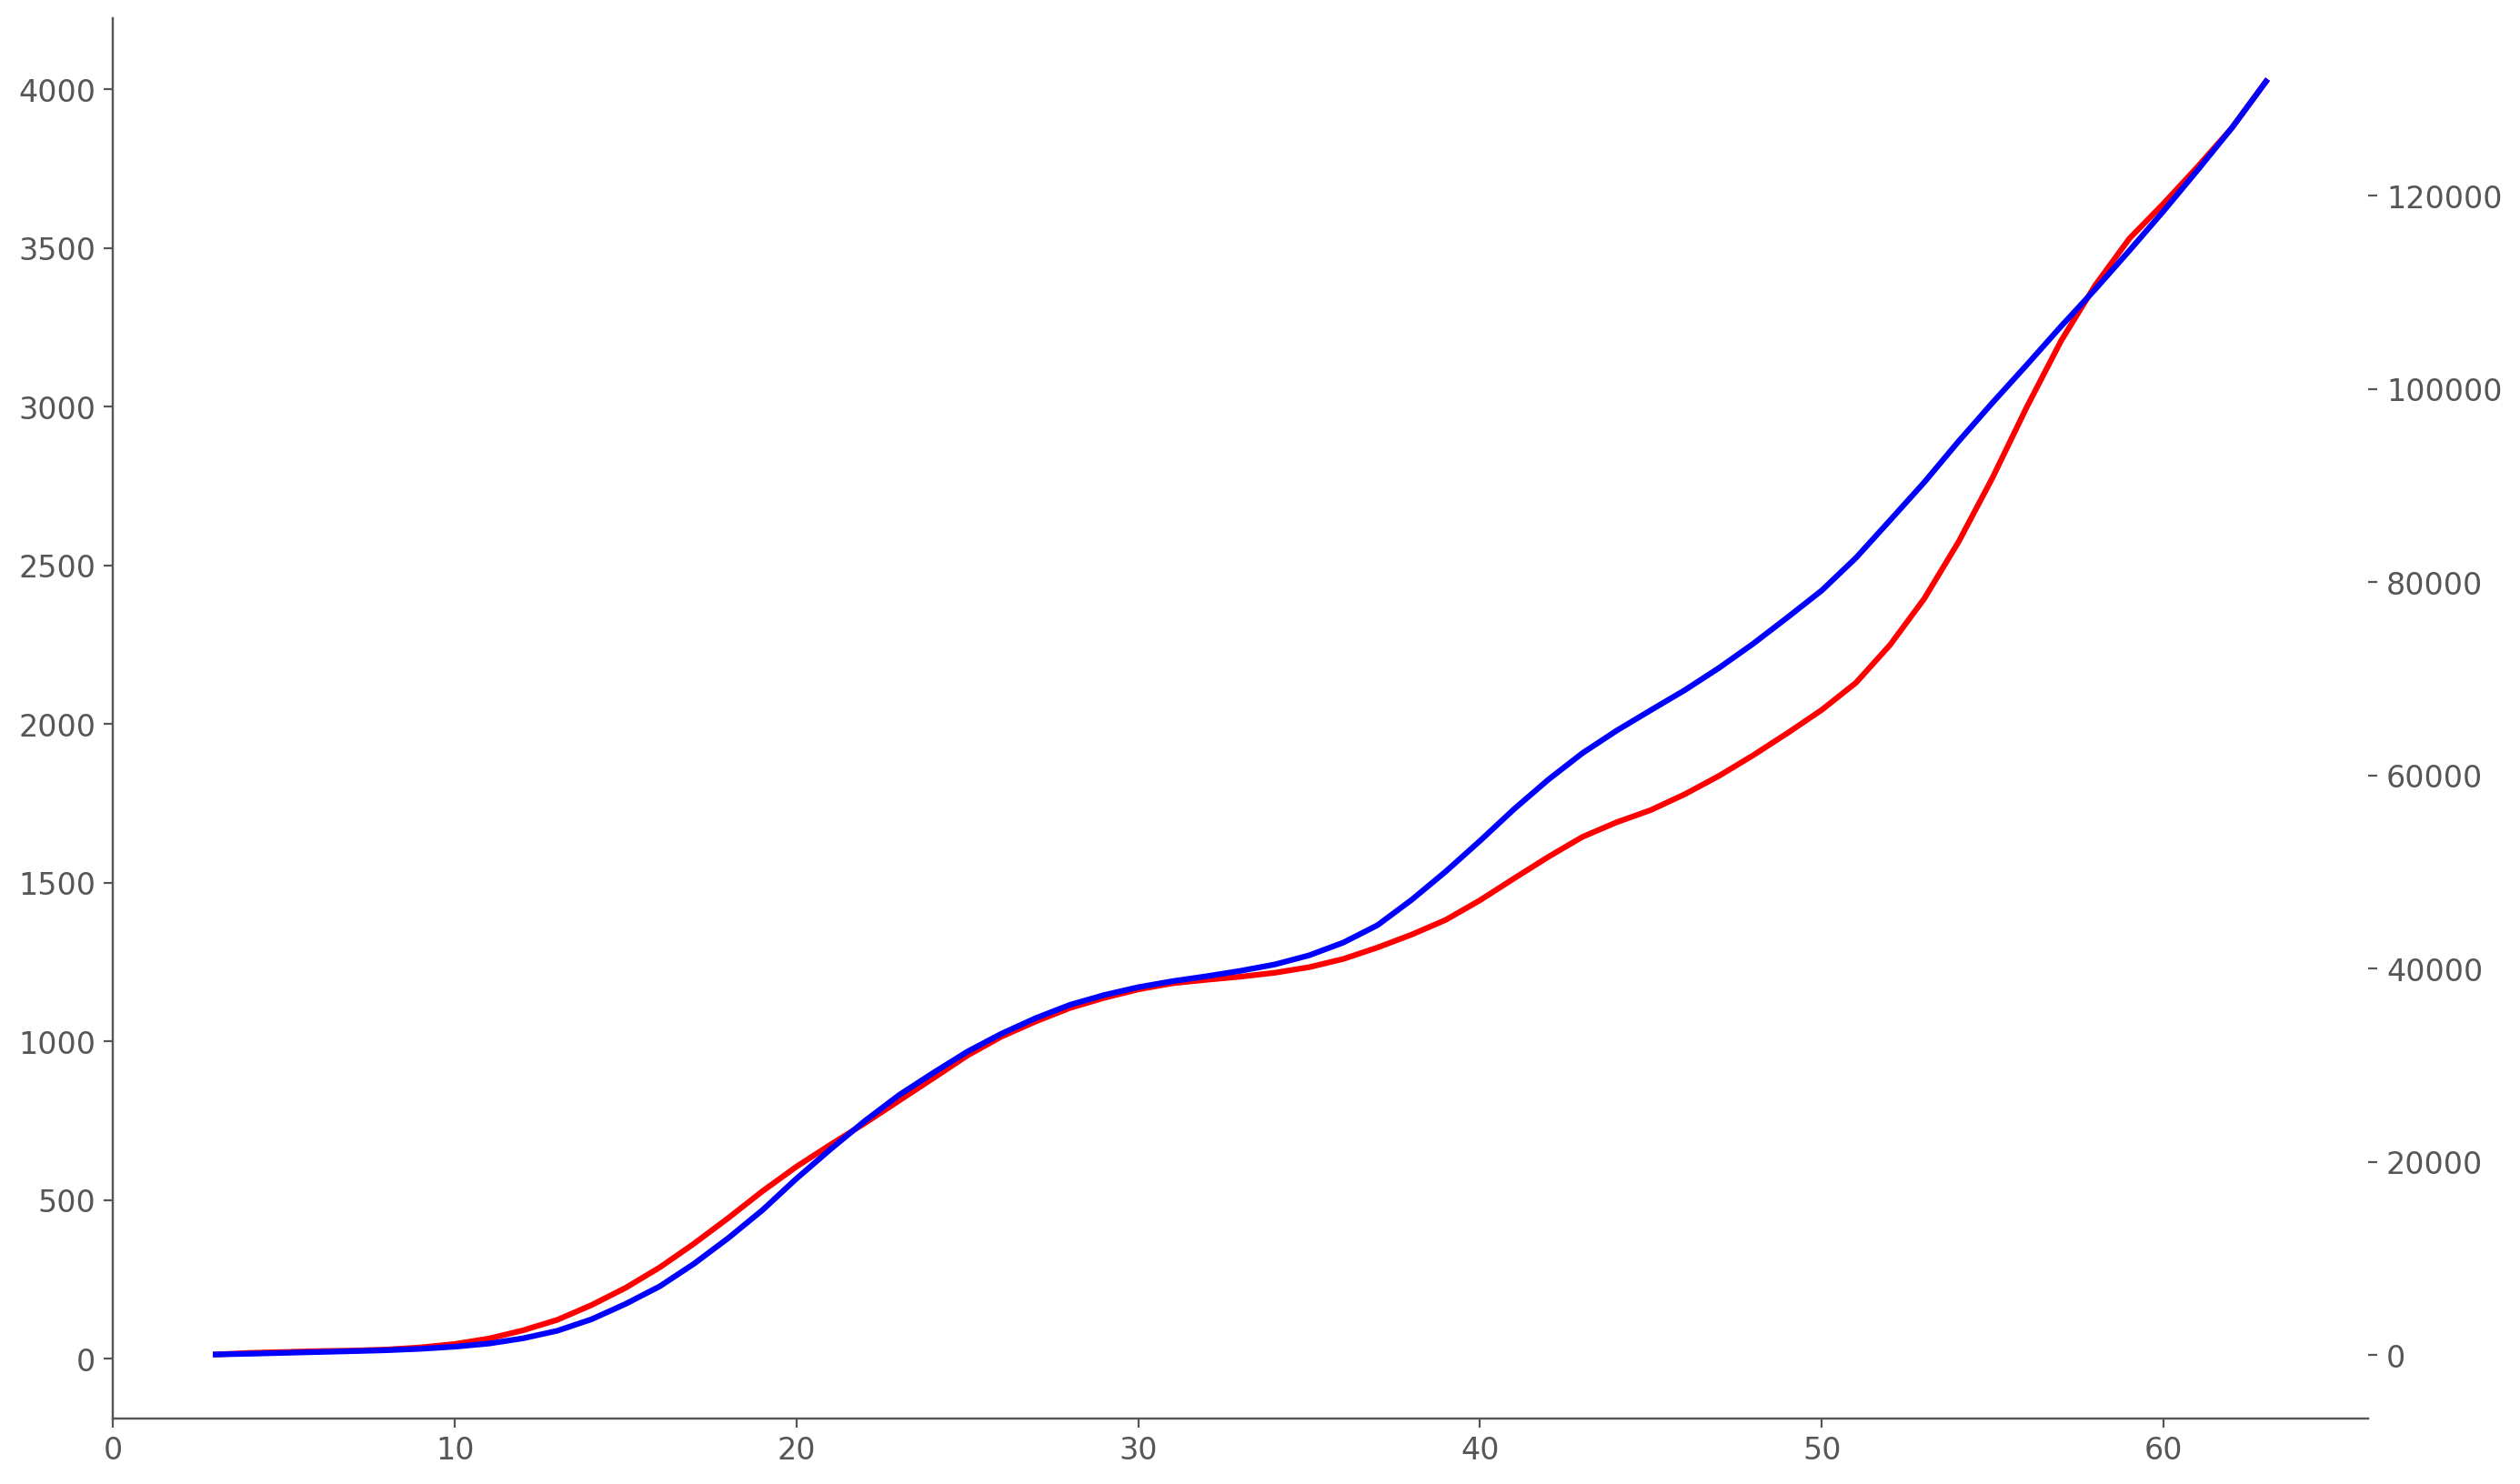

In [82]:
ax1 = df_am.groupby('epidemiological_week').sum().reset_index()['last_available_deaths'][:-1].rolling(4).mean().plot(color='red')
ax2 = ax1.twinx()
ax2 = df_am.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1].rolling(4).mean().plot(color='blue')
plt.plot()

[]

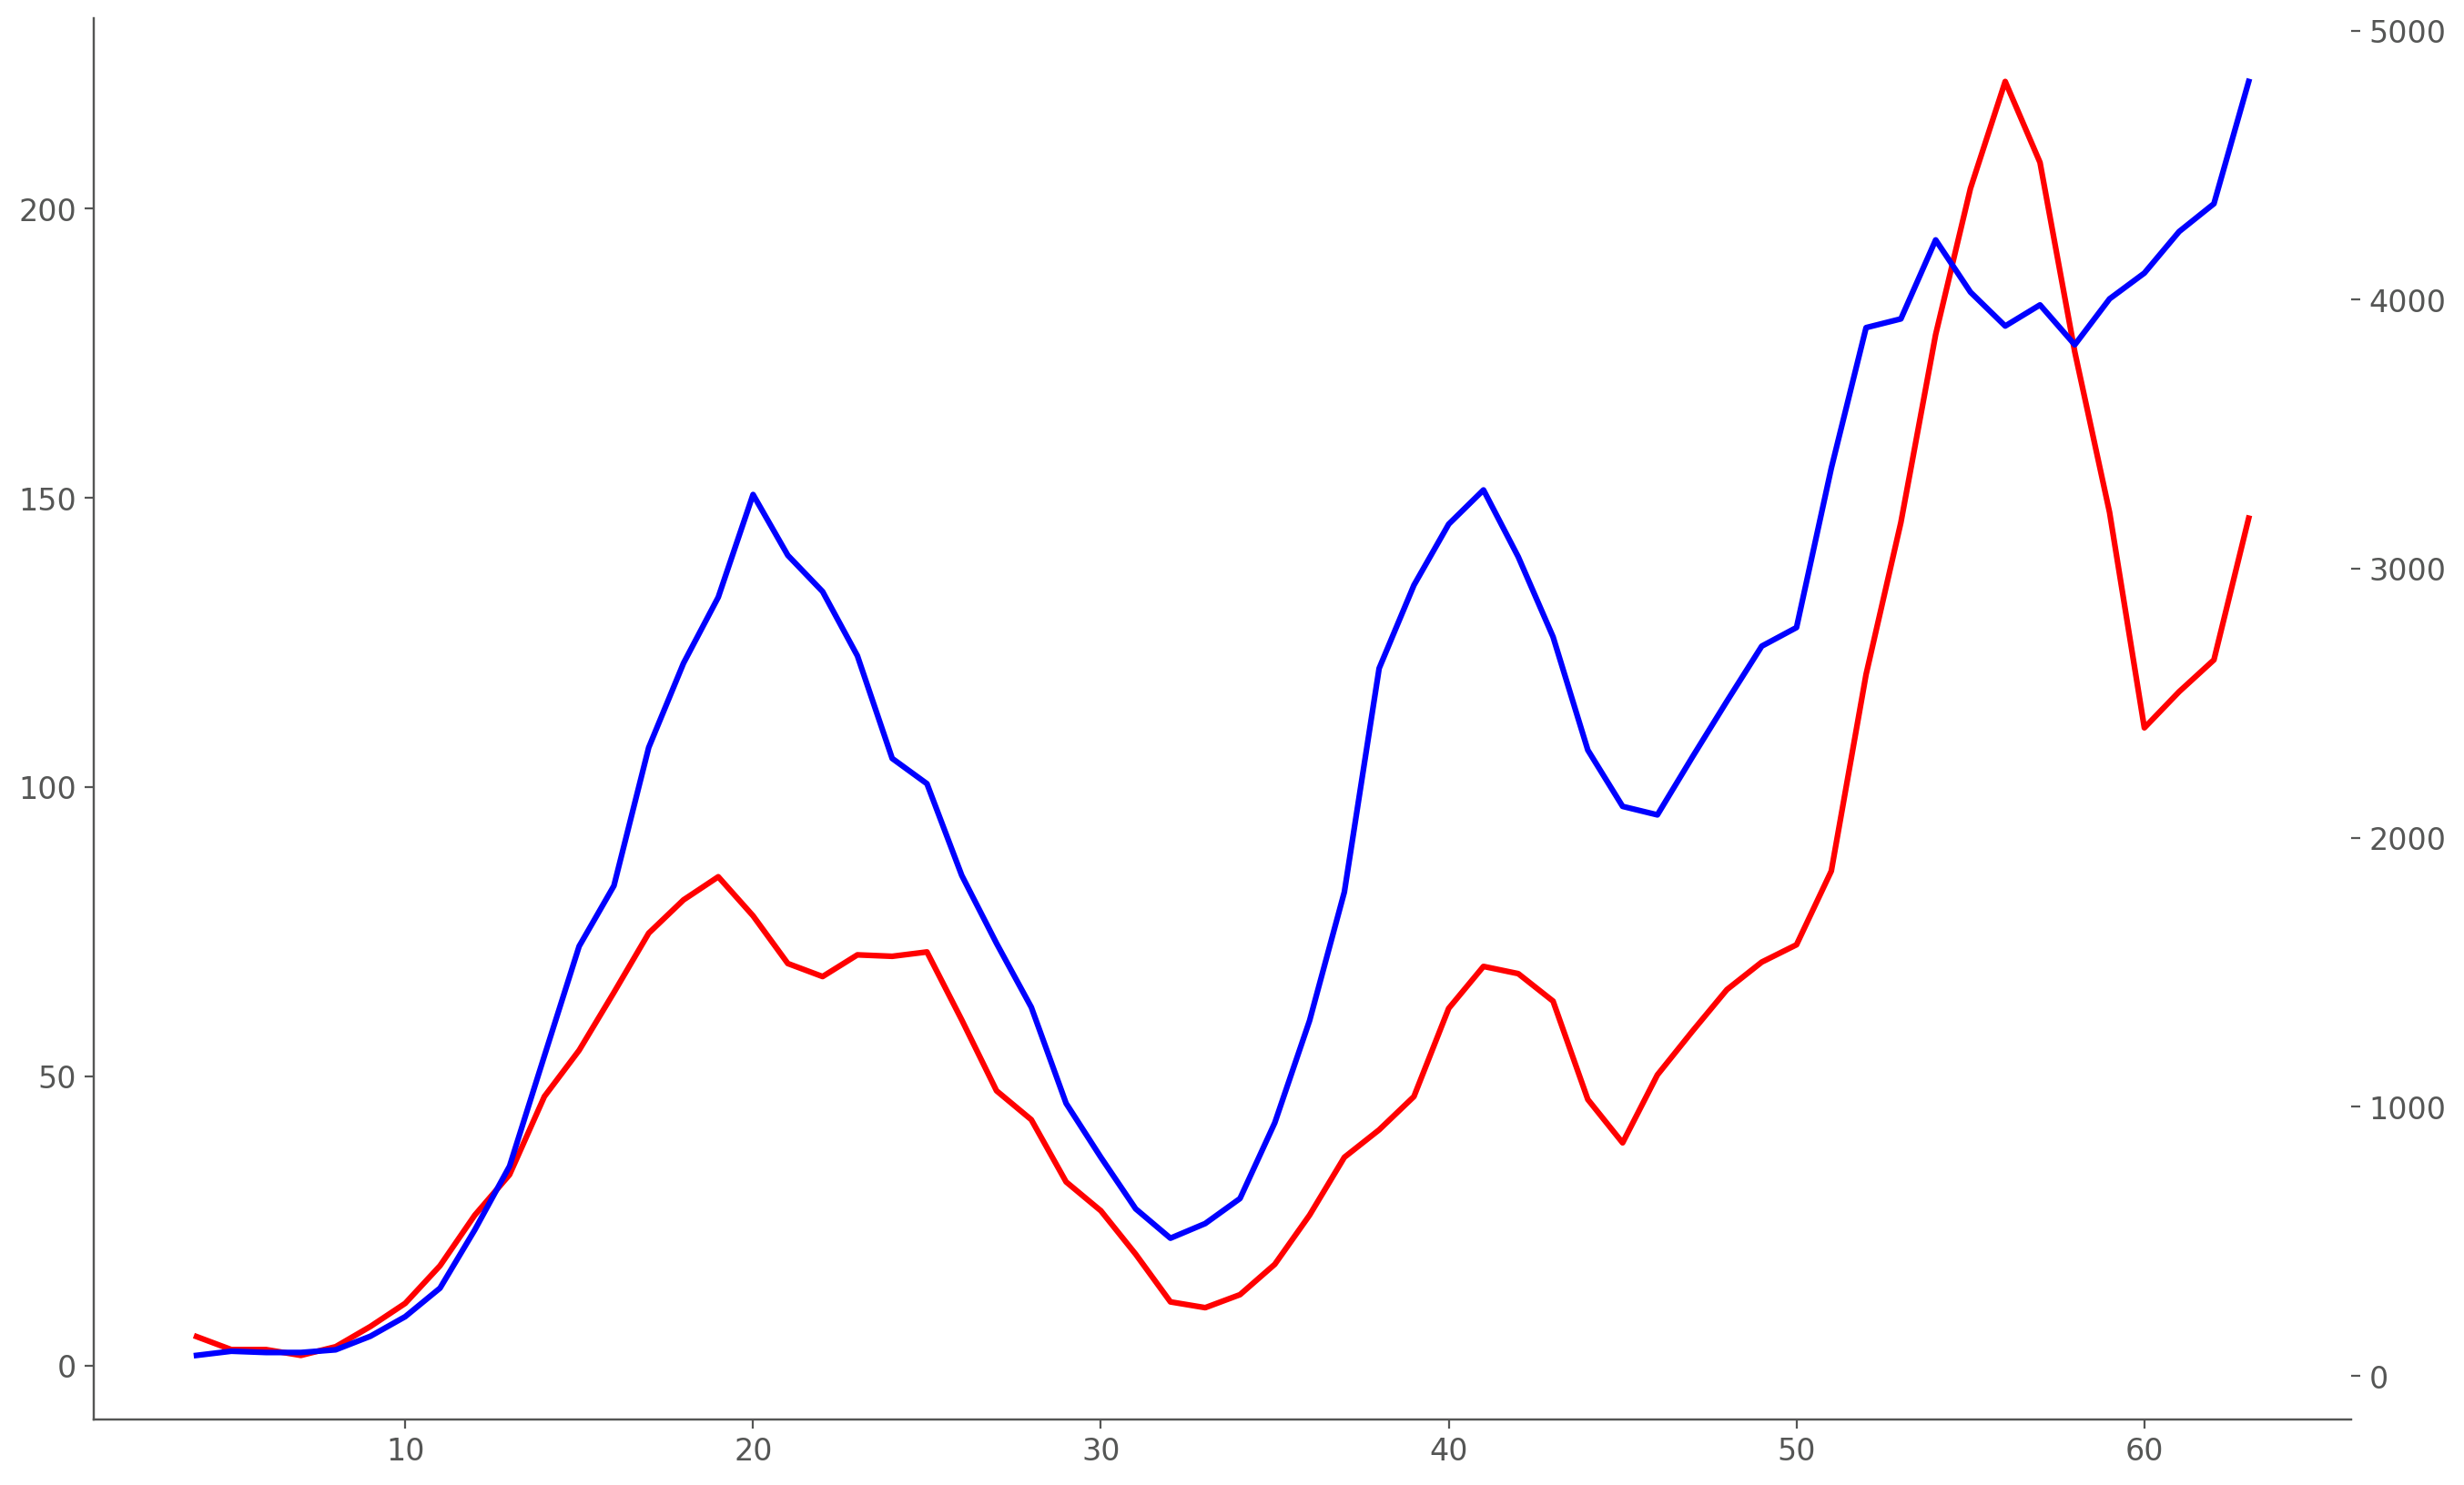

In [83]:
ax1 = df_am.groupby('epidemiological_week').sum().reset_index()['last_available_deaths'][:-1].diff().rolling(4).mean().plot(color='red')
ax2 = ax1.twinx()
ax2 = df_am.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1].diff().rolling(4).mean().plot(color='blue')
plt.plot()

[]

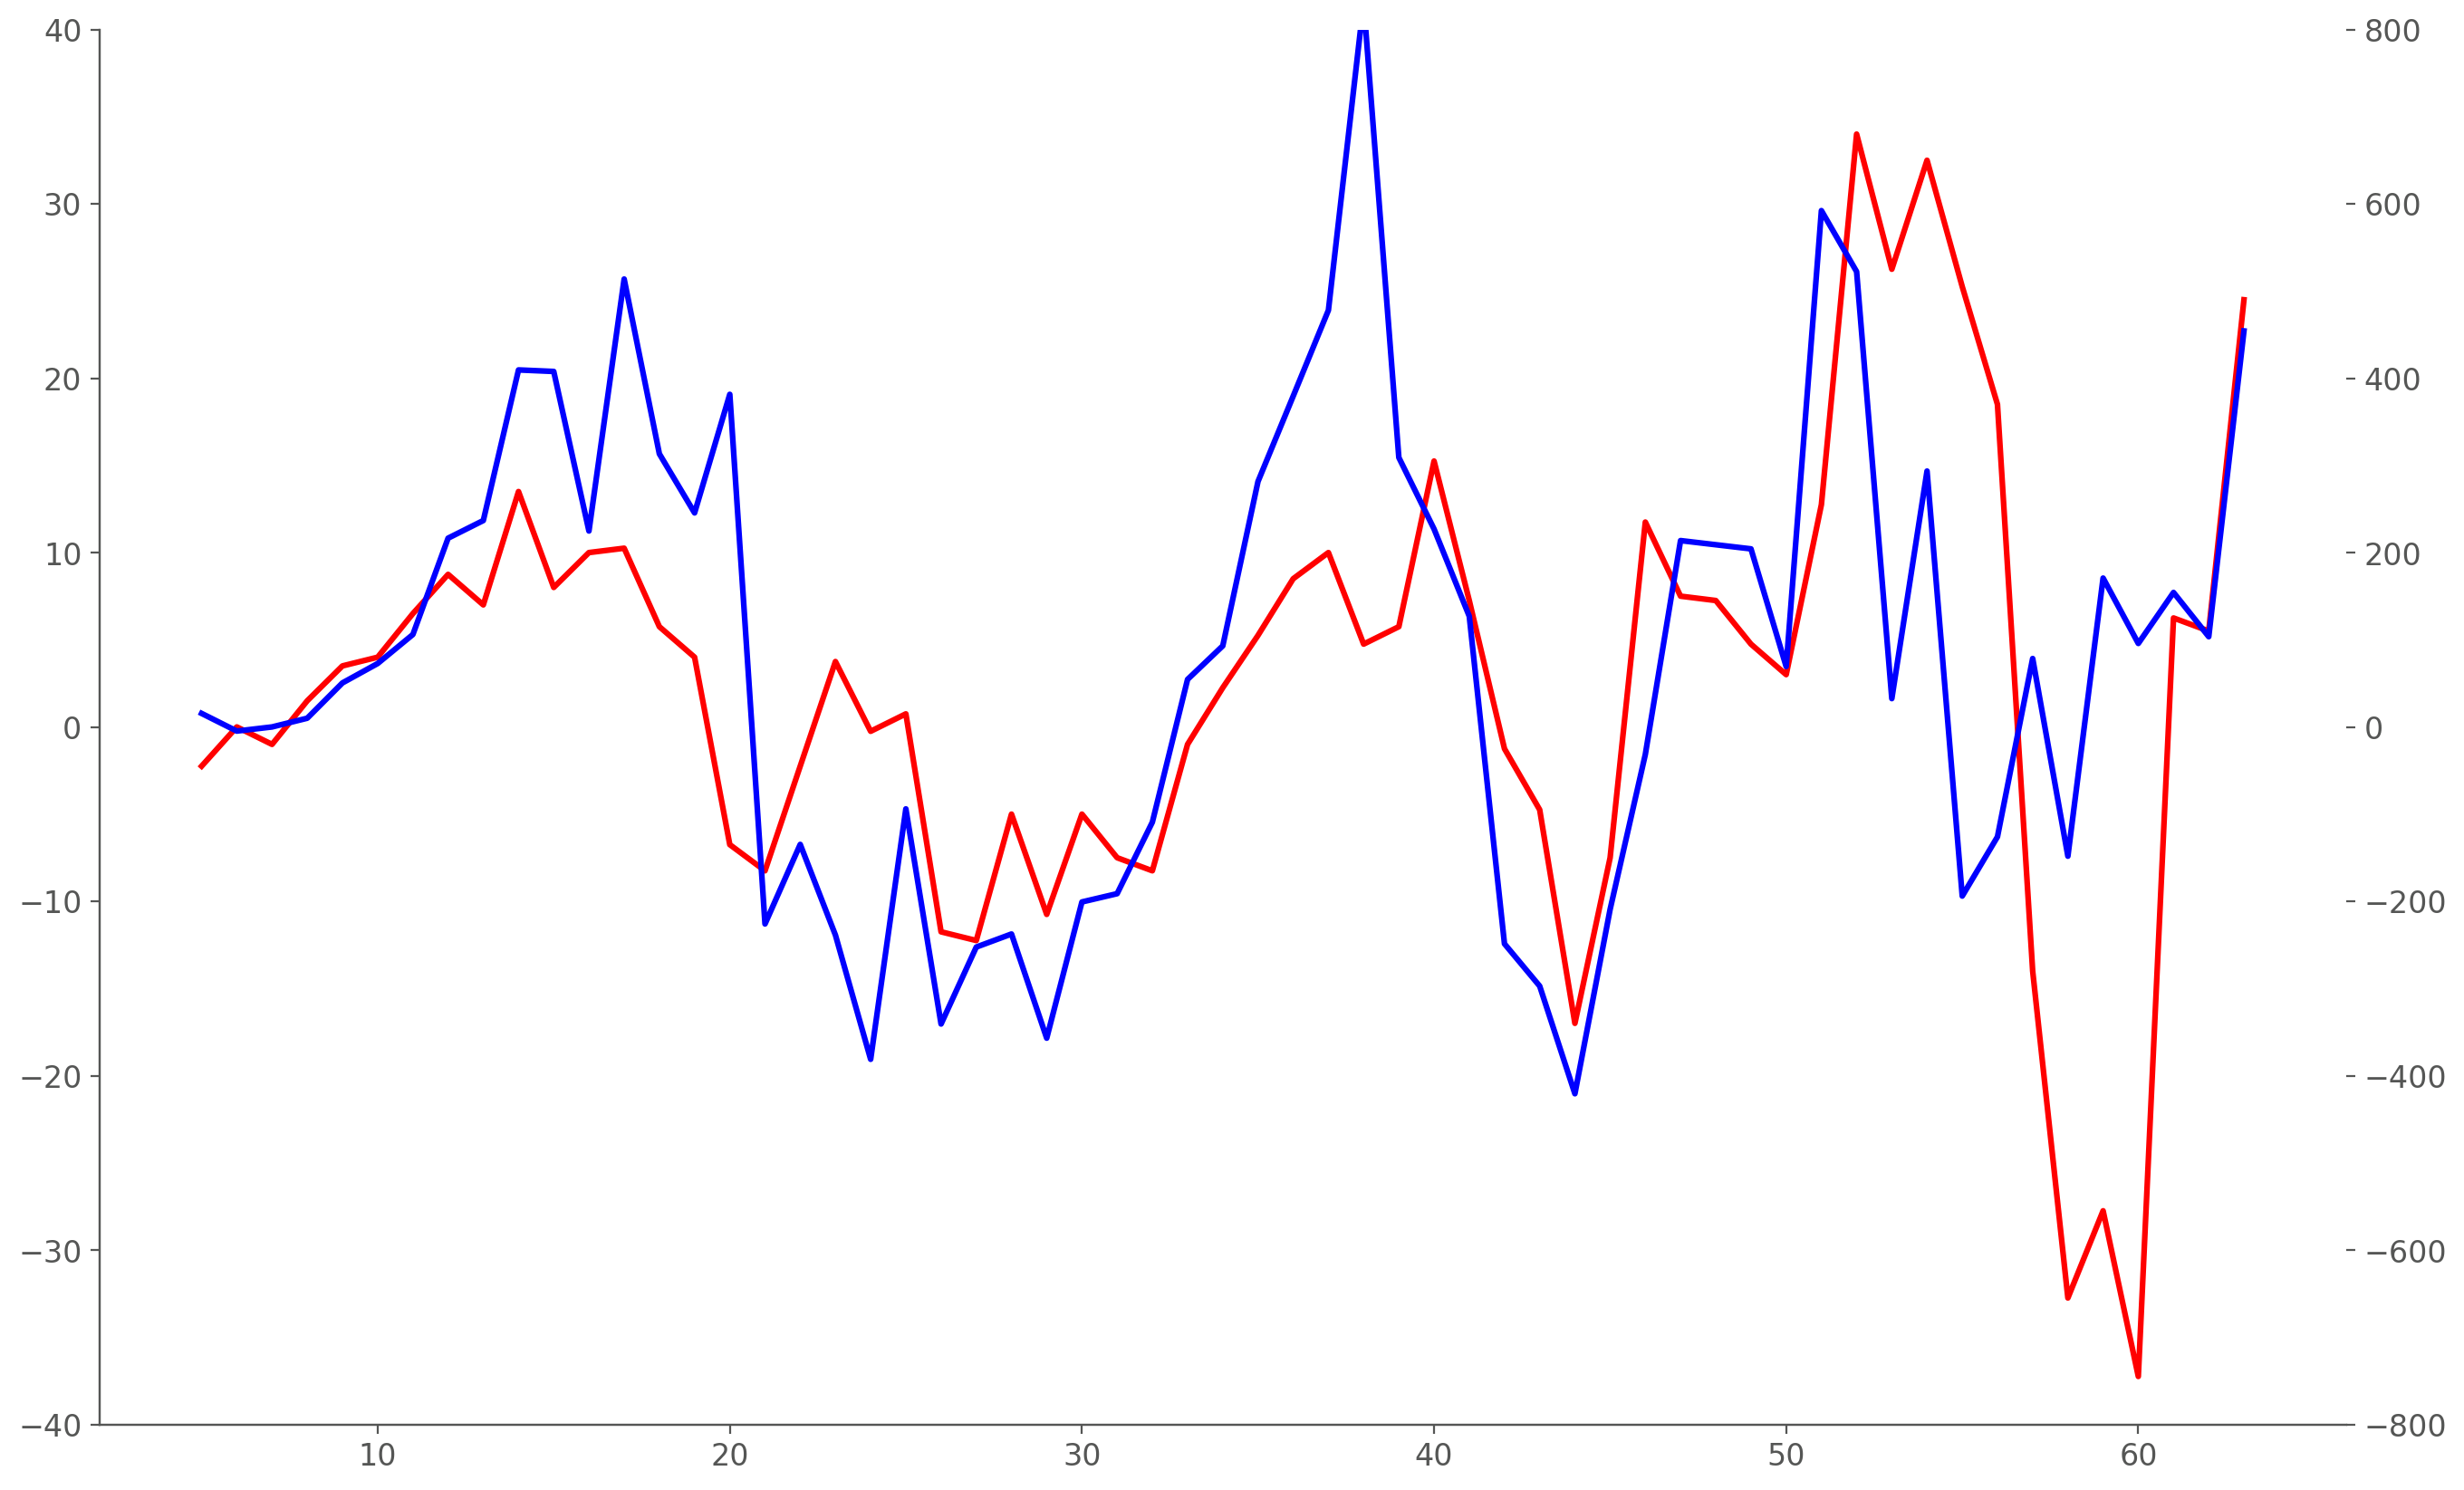

In [87]:
ax1 = df_am.groupby('epidemiological_week').sum().reset_index()['last_available_deaths'][:-1].diff().diff().rolling(4).mean().plot(color='red')
plt.ylim(-40,40)
ax2 = ax1.twinx()
ax2 = df_am.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1].diff().diff().rolling(4).mean().plot(color='blue')
plt.ylim(-800,800)
plt.plot()

[]

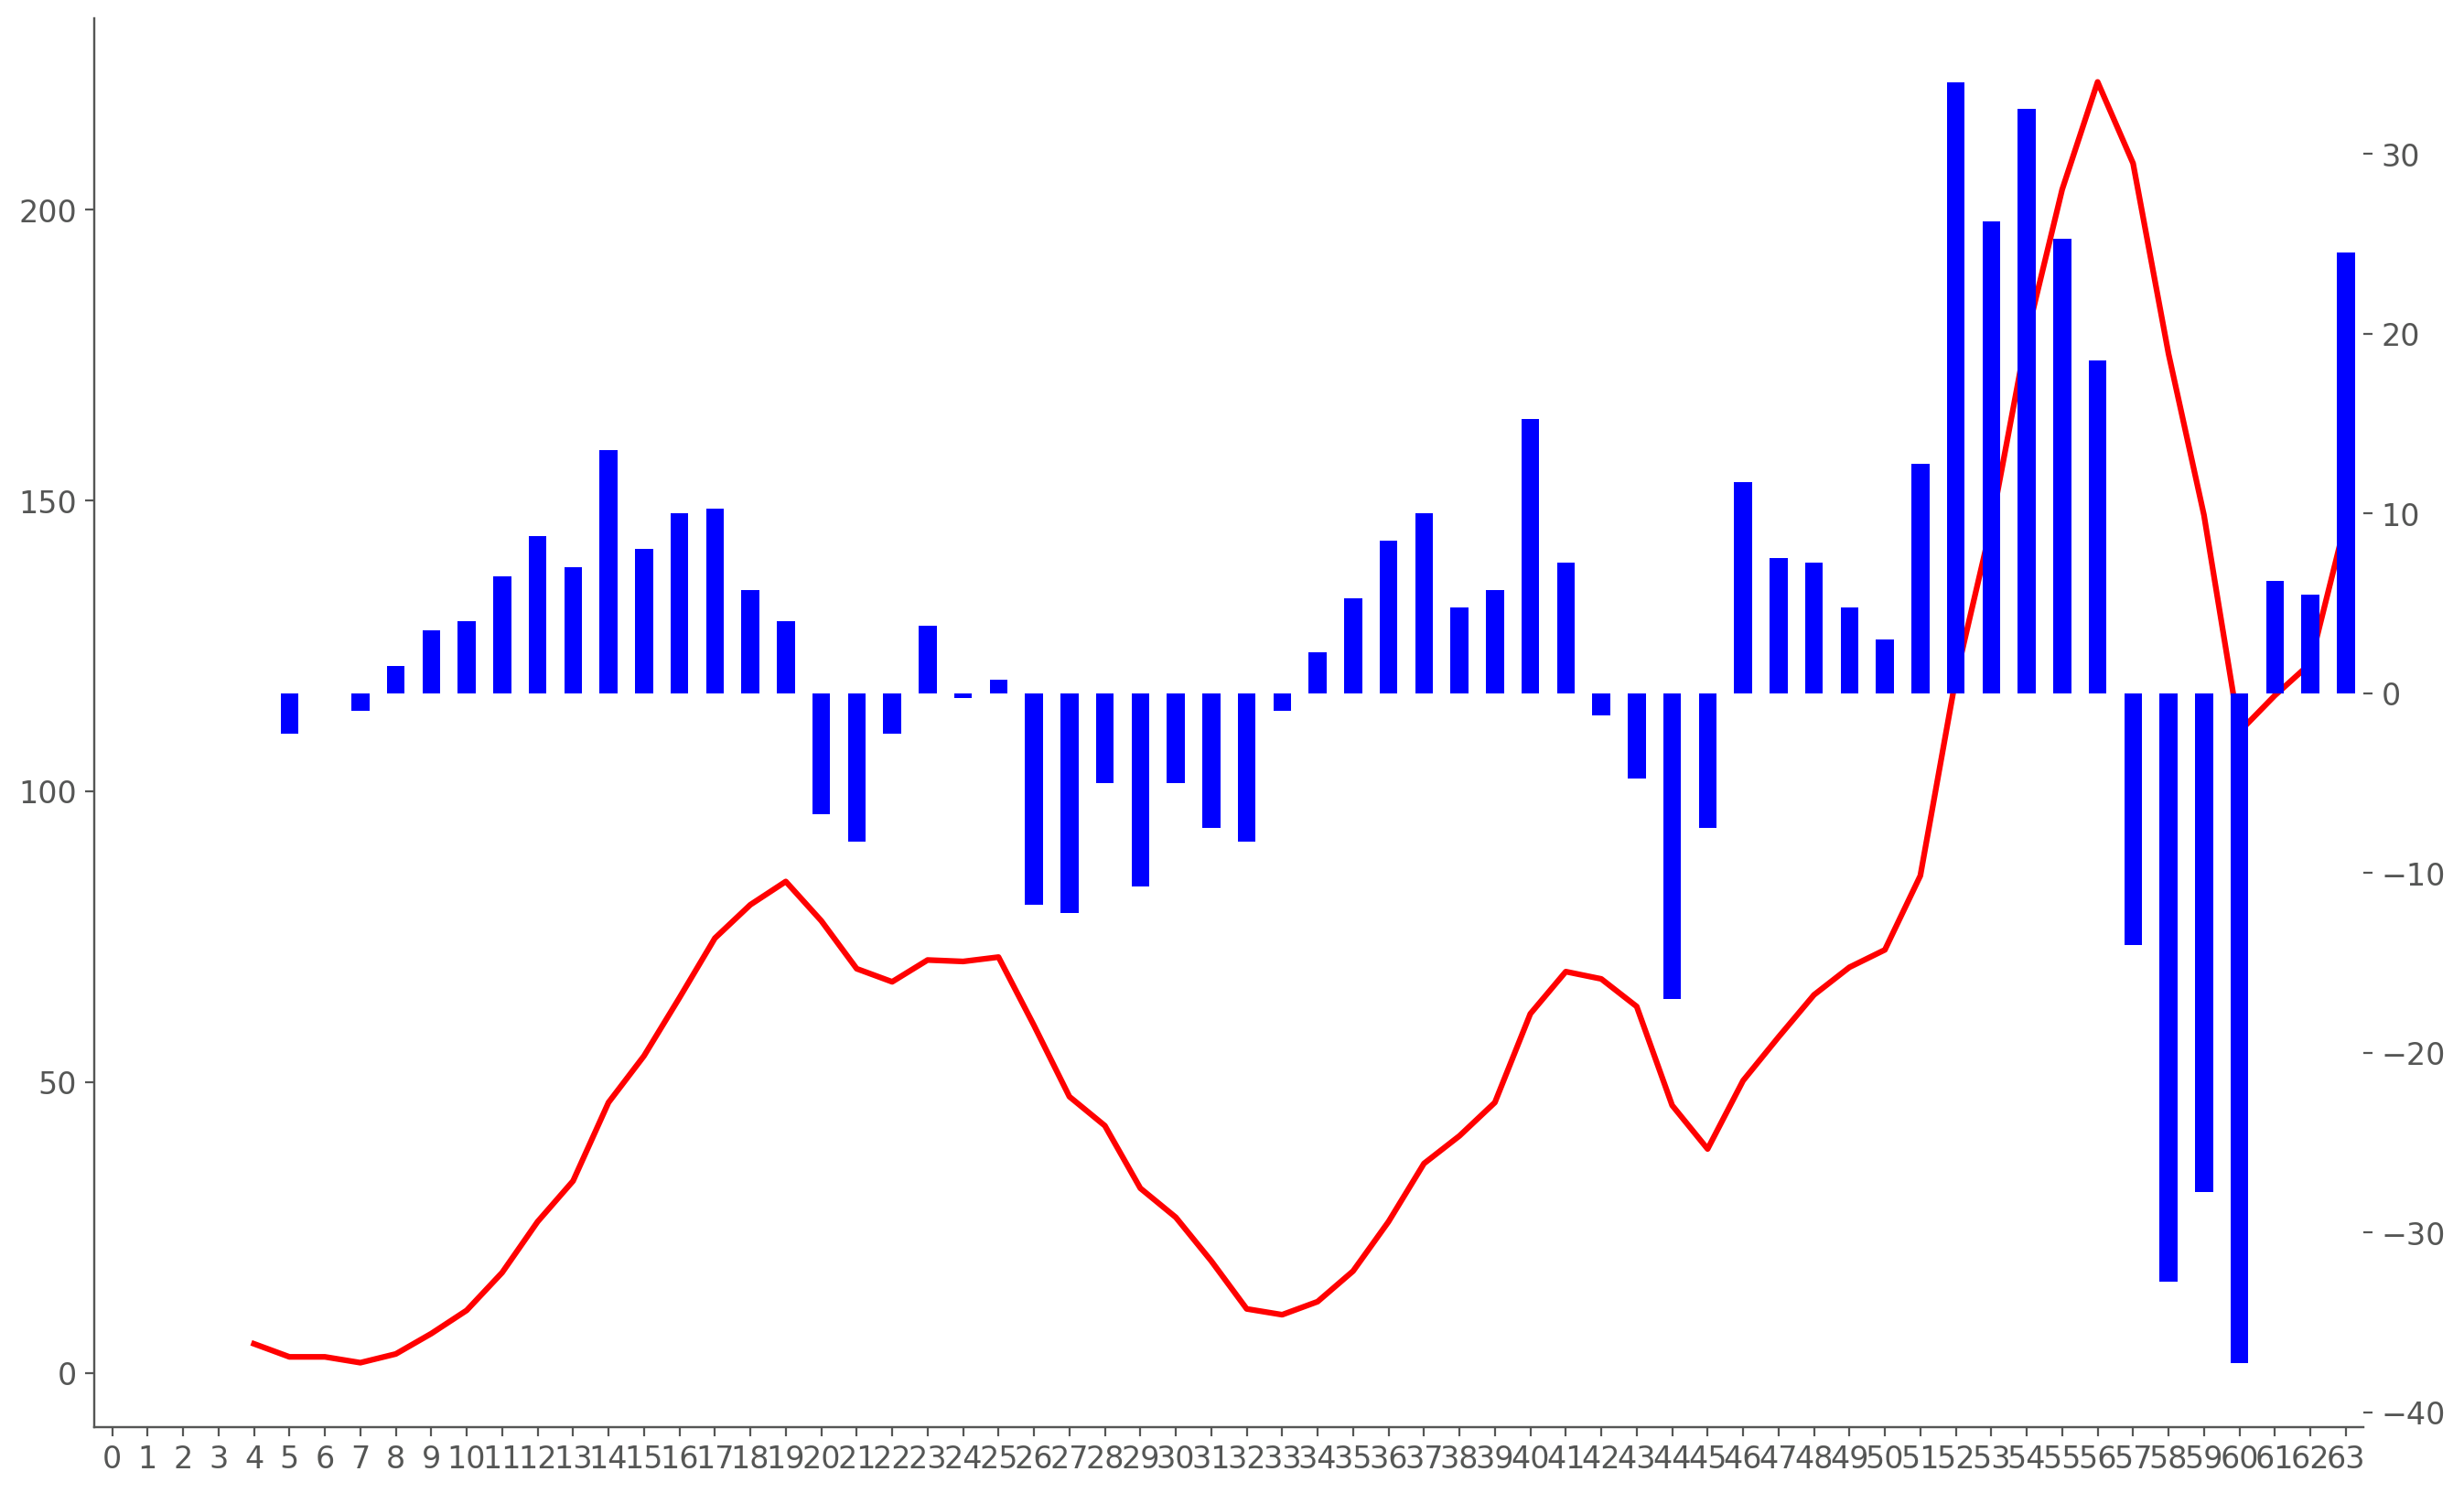

In [92]:
ax1 = df_am.groupby('epidemiological_week').sum().reset_index()['last_available_deaths'][:-1].diff().rolling(4).mean().plot(color='red')
ax2 = ax1.twinx()
ax2 = df_am.groupby('epidemiological_week').sum().reset_index()['last_available_deaths'][:-1].diff().diff().rolling(4).mean().plot(color='blue',kind='bar')
plt.plot()

<AxesSubplot:>

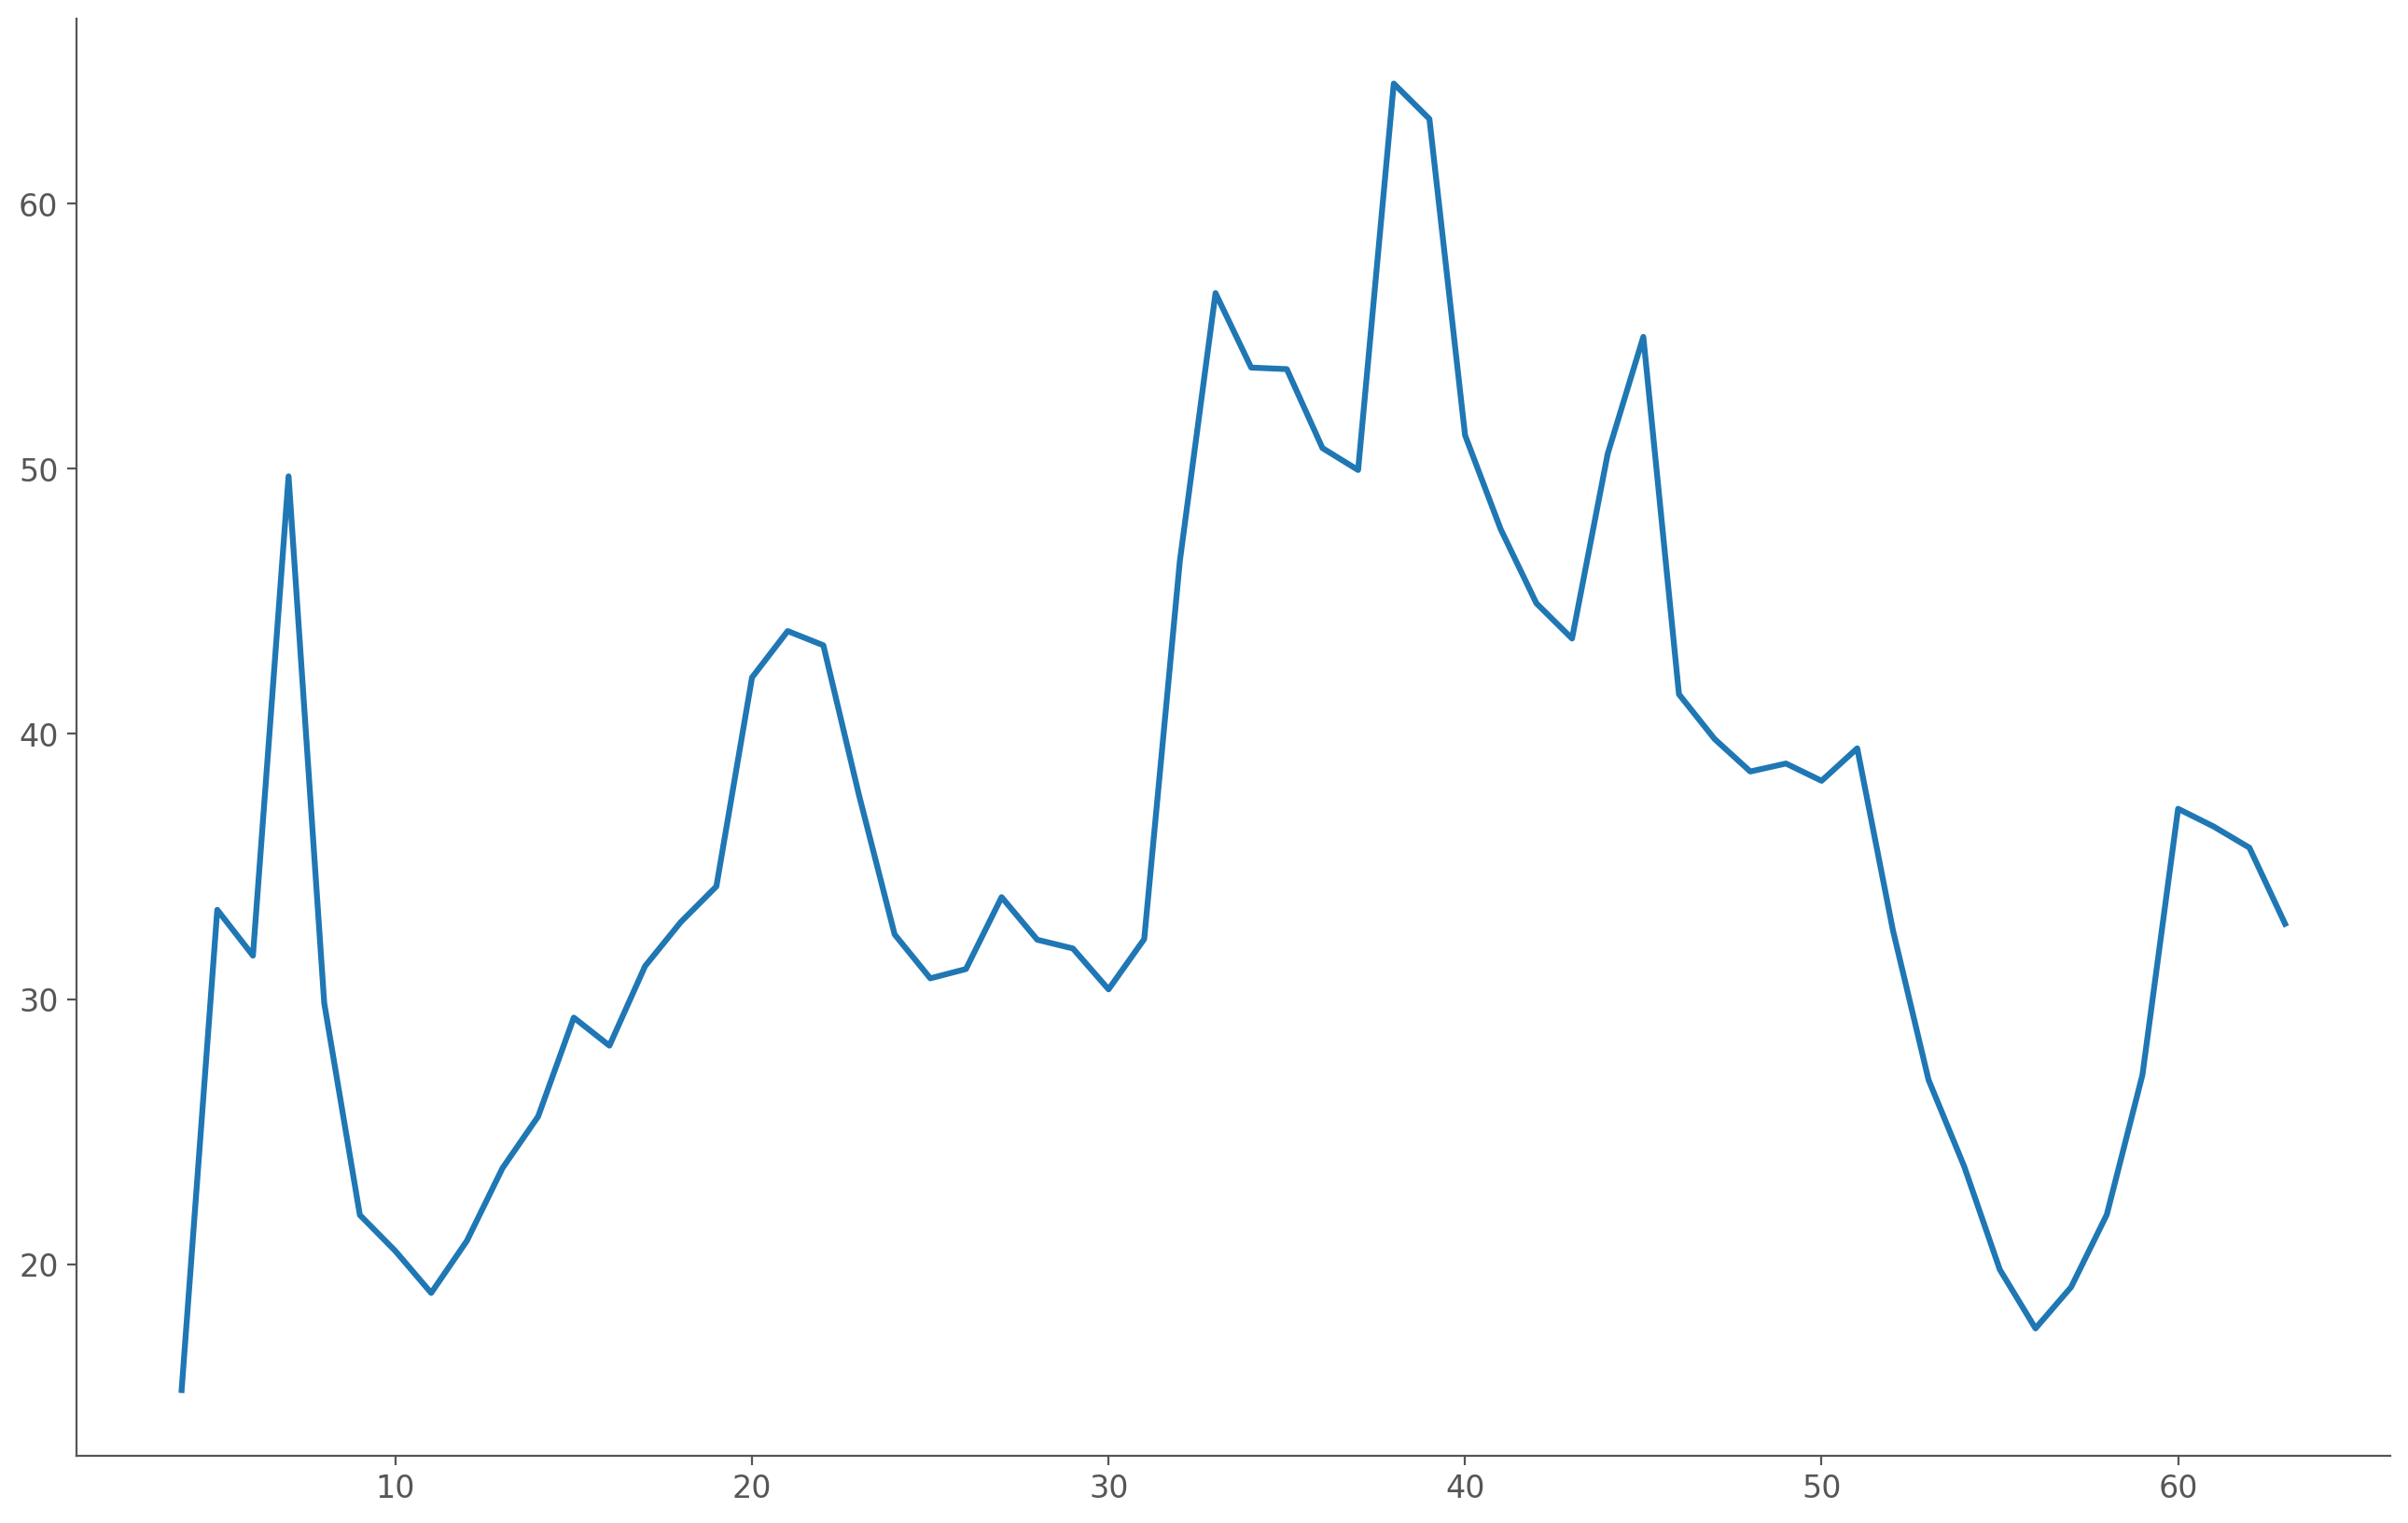

In [98]:
(df_am.groupby('epidemiological_week').sum().reset_index()['last_available_confirmed'][:-1].diff().rolling(4).mean()/df_am.groupby('epidemiological_week').sum().reset_index()['last_available_deaths'][:-1].diff().rolling(4).mean()).plot()